ÂèñÂæó Âè∞ÊåáÊúü ËàáÂ∞èÂ§ñË≥á Êäï‰ø°ÈÄ£Á∑ö

In [2]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime, timedelta

# Ë®≠ÁΩÆMySQLË≥áÊñôÂ∫´ÈÄ£Êé•
db_user = 'root'
db_password = '19970730'
db_host = '127.0.0.1'
db_name = 'sql_stock'

# ÂâµÂª∫Ë≥áÊñôÂ∫´ÈÄ£Êé•ÂºïÊìé
engine = create_engine(f'mysql+mysqlconnector://{db_user}:{db_password}@{db_host}/{db_name}')

# Ë®≠ÁΩÆÊó•ÊúüÁØÑÂúç
#today = datetime(2024, 5, 25)
today = datetime.now().date()
one_year_ago = today - timedelta(days=1000)

# Ê†ºÂºèÂåñÊó•Êúü
today_str = today.strftime('%Y%m%d')
one_year_ago_str = one_year_ago.strftime('%Y%m%d')

# ÂèØËá™Áî±Ë™øÊï¥selectÁöÑÂçÄÈñì
# today_str = '20240813'
today_str = '20241231'
one_year_ago_str = '20210101'

# SQL Êü•Ë©¢ Âä†Ê¨äÊåáÊï∏
query_daily_tx = f"""
SELECT *
FROM daily_tx
WHERE date >= '{one_year_ago_str}' AND date <= '{today_str}'
"""

# SQL Êü•Ë©¢ Âä†Ê¨äÊåáÊï∏
query_tif_investors = f"""
SELECT *
FROM daily_tif_investors
WHERE date >= '{one_year_ago_str}' AND date <= '{today_str}'
"""

# ‰ΩøÁî® pd.read_sql ‰æÜÂü∑Ë°åÊü•Ë©¢‰∏¶ËÆÄÂèñÊï∏ÊìöÂà∞ DataFrame
tif_investors_df_raw = pd.read_sql(query_tif_investors, engine)
# ‰ΩøÁî® pd.read_sql ‰æÜÂü∑Ë°åÊü•Ë©¢‰∏¶ËÆÄÂèñÊï∏ÊìöÂà∞ DataFrame
tx_df_raw = pd.read_sql(query_daily_tx, engine)

In [3]:
tif_investors_df_raw
# ‰∫îÂ§ßÁâπÂÆöÊ∑®ÈÉ®‰Ωç
top5_sp = tif_investors_df_raw['Ë≤∑ÊñπÂâç‰∫îÂ§ß‰∫§Êòì‰∫∫ÂêàË®à'] - tif_investors_df_raw['Ë≥£ÊñπÂâç‰∫îÂ§ß‰∫§Êòì‰∫∫ÂêàË®à']
# Â§ßÂ§ñË≥á = ‰∫îÂ§ßÊ∏õÊäï‰ø° (Êäï‰ø°ÊáâË©≤‰æùÂÆöÊúÉÈÄ≤ÂéªÂâç‰∫îÂ§ß)
big_foreign = top5_sp - tif_investors_df_raw['Êäï‰ø°Êú™Âπ≥ÂÄâÈ§òÈ°çÂè£Êï∏']
# Â∞èÂ§ñË≥á
small_foreign = tif_investors_df_raw['Â§ñË≥áÊú™Âπ≥ÂÄâÈ§òÈ°çÂè£Êï∏'] - big_foreign

tif_investors_df_raw['Â§ßÂ§ñË≥á']  = big_foreign
tif_investors_df_raw['Â∞èÂ§ñË≥á']  = small_foreign



# Â∞Ü 'Date' ÂàóËΩ¨Êç¢‰∏∫ datetime Á±ªÂûã
tif_investors_df_raw['Date'] = pd.to_datetime(tif_investors_df_raw['Date'])
tx_df_raw['Date'] = pd.to_datetime(tx_df_raw['Date'])  # ÂÅáËÆæ‰Ω†Êúâ‰∏Ä‰∏™ Date Âàó


tx_df_raw.loc[:, '5MA'] = tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'].rolling(5).mean()
tx_df_raw.loc[:, '8MA'] = tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'].rolling(8).mean()
tx_df_raw.loc[:, '10MA'] = tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'].rolling(10).mean()
tx_df_raw.loc[:, '20MA']= tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'].rolling(20).mean()
tx_df_raw.loc[:, '60MA']= tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'].rolling(60).mean()
tx_df_raw.loc[:, '240MA']= tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'].rolling(240).mean()

tx_df_raw = tx_df_raw.fillna(0)


Áï´Áï´ÂâçÊ∫ñÂÇô Ë®≠ÂÆöINDEX (‰∏çÂèØÈáçË§áË®≠ÂÆö)

In [11]:
# Áï´Áï´ÂâçÊ∫ñÂÇôË≥áÊñô
# Â∞áÊ¨Ñ‰ΩçÂêçÁ®±ÊîπÁÇ∫ 'Open', 'High', 'Low', 'Close'
tx_df_forplot = tx_df_raw.copy()
tif_investors_forplot = tif_investors_df_raw.copy()
tx_df_forplot.rename(columns={'ÈñãÁõ§ÂÉπ': 'Open', 'ÊúÄÈ´òÂÉπ': 'High', 'ÊúÄ‰ΩéÂÉπ': 'Low', 'ÊúÄÂæåÊàê‰∫§ÂÉπ': 'Close'}, inplace=True)
tx_df_forplot.set_index('Date', inplace=True)
tif_investors_forplot.set_index('Date', inplace=True)

ÂèØÈÄèÈÅé plot_size Ë™øÊï¥Áπ™Áï´ÁöÑÂ∞∫Â∫¶ (ÂñÆ‰Ωç:Â§©Êï∏)

In [9]:
# Áï´Áï´Ë¶ÅÁï´ÂπæÂ§©ÁöÑË≥áÊñô
plot_size = 100

Â§ßÂ§ñË≥á

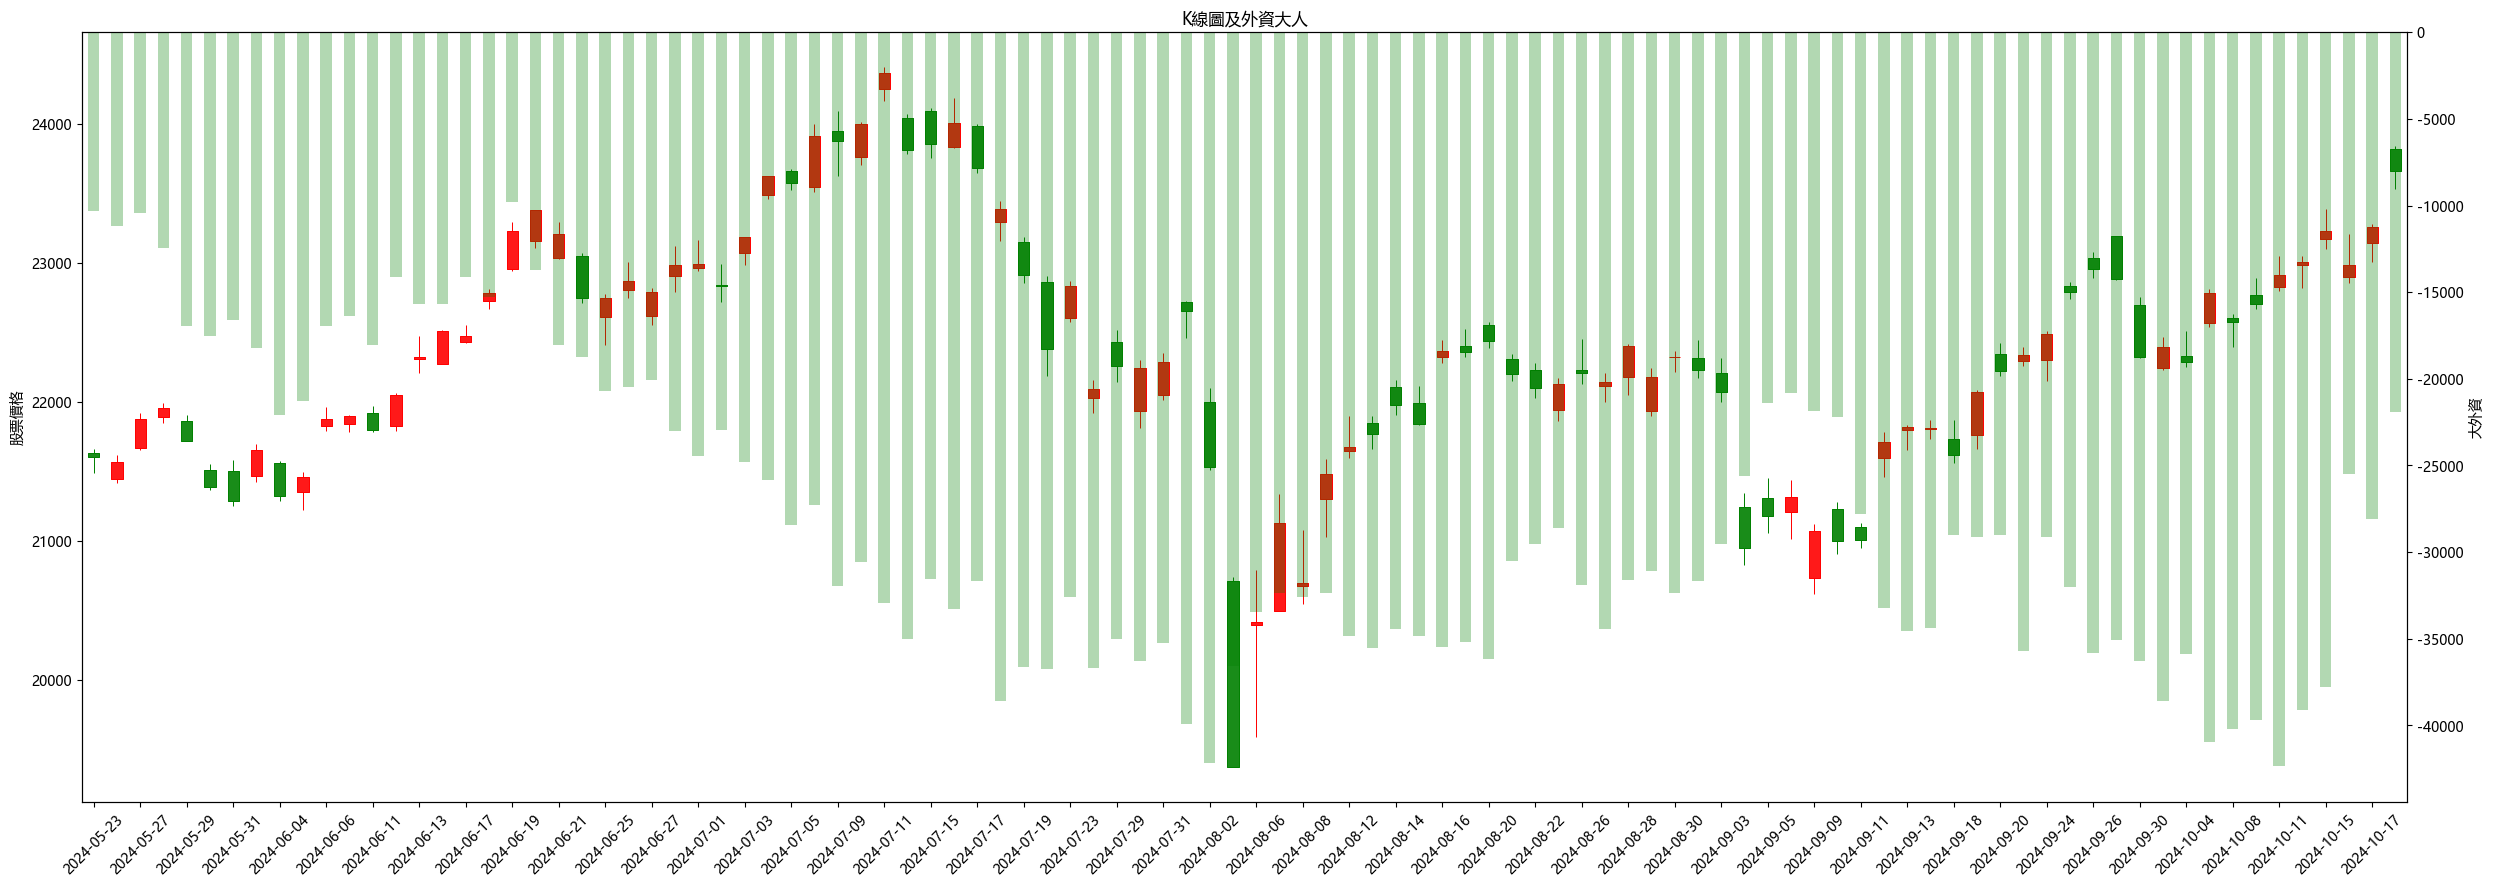

In [78]:
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


tx_df_raw_100 = tx_df_forplot.tail(plot_size)
tif_investors_df_raw_100 = tif_investors_forplot.tail(plot_size)
tif_investors_df_raw_100.index = tif_investors_df_raw_100.index.strftime('%Y-%m-%d')

# Ë®≠ÁΩÆ‰∏≠ÊñáÂ≠óÈ´î
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # ‰ΩøÁî®ÂæÆËªüÊ≠£ÈªëÈ´î (ÂèØÊ†πÊìöÁ≥ªÁµ±Â≠óÈ´îÈÅ∏Êìá)
plt.rcParams['axes.unicode_minus'] = False  # Ëß£Ê±∫Ë≤†ËôüÈ°ØÁ§∫ÂïèÈ°å


# ÂÅáË®≠‰Ω†ÁöÑ dataframe Âê´ÊúâÂøÖË¶ÅÁöÑ OHLC Êï∏Êìö (Open, High, Low, Close)
ohlc_data = tx_df_raw_100[['Open', 'High', 'Low', 'Close']]

# Ëá™ÂÆöÁæ©È°èËâ≤Ê®£ÂºèÔºå‰∏äÊº≤ÁÇ∫Á¥ÖËâ≤Ôºå‰∏ãË∑åÁÇ∫Á∂†Ëâ≤
my_color = mpf.make_marketcolors(up='red', down='green', edge='inherit', wick='inherit', volume='inherit')

# Ëá™ÂÆöÁæ©Ê®£Âºè
my_style = mpf.make_mpf_style(marketcolors=my_color)

# Ë®≠ÁΩÆ‰∏ªÂúñÂíåÊ¨°Âúñ
fig, ax1 = plt.subplots(figsize=(30,10))

# Áπ™Ë£ΩË†üÁá≠ÂúñÂà∞ ax1Ôºå‰ΩøÁî®Ëá™ÂÆöÁæ©ÁöÑÈ°èËâ≤Ê®£Âºè
mpf.plot(ohlc_data, type='candle', ax=ax1, volume=False, style=my_style)

# Ë®≠ÂÆö x Ëª∏Âè™È°ØÁ§∫Êó•Êúü
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Ê†ºÂºèÂåñÊó•ÊúüÈ°ØÁ§∫
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())  # Ëá™ÂãïË®≠ÁΩÆÊó•ÊúüÈñìÈöî

# ÊóãËΩâ x Ëª∏Ê®ôÁ±§‰ª•‰æøÊõ¥Ê∏ÖÊ•öÈ°ØÁ§∫
plt.xticks(rotation=45)

# ÂâµÂª∫‰∏ÄÂÄãÂÖ±‰∫´ X Ëª∏‰ΩÜÊúâ‰∏çÂêå Y Ëª∏ÁöÑÊ¨°Âúñ ax2
ax2 = ax1.twinx()

# Áπ™Ë£ΩÂ∞èÂ§ñË≥áÁöÑÊ≠£Ë≤†Èï∑Ê¢ùÂúñÂà∞ ax2
tif_investors_df_raw_100['Â§ßÂ§ñË≥á'].plot(kind='bar', 
                                       color=['red' if v >= 0 else 'green' for v in tif_investors_df_raw_100['Â§ßÂ§ñË≥á']],
                                       ax=ax2, alpha=0.3)  # Ë™øÊï¥ÈÄèÊòéÂ∫¶‰ª•È°ØÁ§∫Ë†üÁá≠Âúñ

ax1.set_xticks(ax1.get_xticks()[::2])  # ÊØèÈöî5‰∏™Ê†áÁ≠æÊòæÁ§∫‰∏Ä‰∏™

# Áπ™Ë£Ω 10MA ÁßªÂãïÂπ≥ÂùáÁ∑öÂà∞ ax1
#ax1.plot(tx_df_raw['10MA'].index, tx_df_raw['10MA'], label='10MA', color='blue', linewidth=2)

# Ë®≠ÂÆöÊ®ôÈ°åÂíåËª∏Ê®ôÁ±§
plt.title('KÁ∑öÂúñÂèäÂ§ñË≥áÂ§ß‰∫∫')
ax1.set_ylabel('ËÇ°Á•®ÂÉπÊ†º')
ax2.set_ylabel('Â§ßÂ§ñË≥á')

# È°ØÁ§∫ÂúñË°®
plt.show()


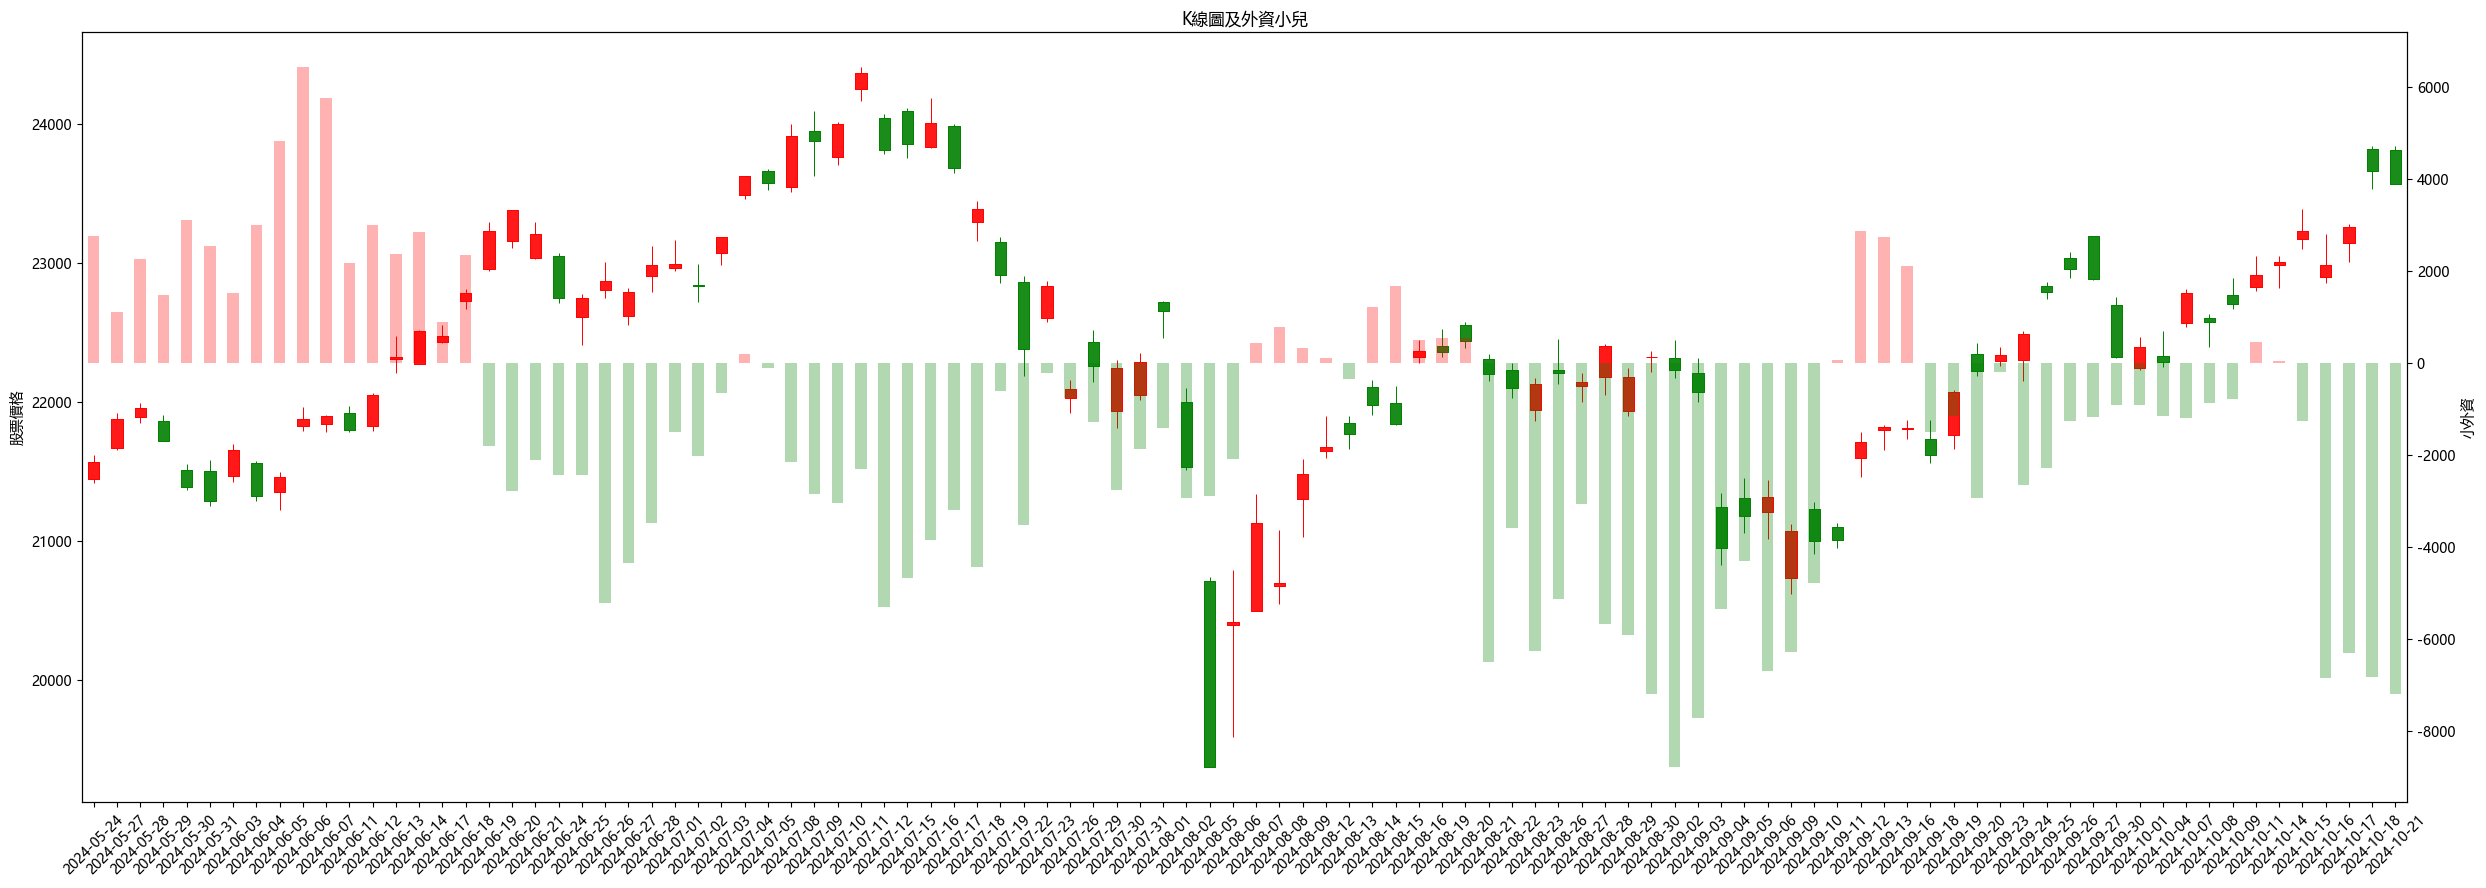

In [12]:
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


tx_df_raw_100 = tx_df_forplot.tail(plot_size)
tif_investors_df_raw_100 = tif_investors_forplot.tail(plot_size)
tif_investors_df_raw_100.index = tif_investors_df_raw_100.index.strftime('%Y-%m-%d')

# Ë®≠ÁΩÆ‰∏≠ÊñáÂ≠óÈ´î
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # ‰ΩøÁî®ÂæÆËªüÊ≠£ÈªëÈ´î (ÂèØÊ†πÊìöÁ≥ªÁµ±Â≠óÈ´îÈÅ∏Êìá)
plt.rcParams['axes.unicode_minus'] = False  # Ëß£Ê±∫Ë≤†ËôüÈ°ØÁ§∫ÂïèÈ°å


# ÂÅáË®≠‰Ω†ÁöÑ dataframe Âê´ÊúâÂøÖË¶ÅÁöÑ OHLC Êï∏Êìö (Open, High, Low, Close)
ohlc_data = tx_df_raw_100[['Open', 'High', 'Low', 'Close']]

# Ëá™ÂÆöÁæ©È°èËâ≤Ê®£ÂºèÔºå‰∏äÊº≤ÁÇ∫Á¥ÖËâ≤Ôºå‰∏ãË∑åÁÇ∫Á∂†Ëâ≤
my_color = mpf.make_marketcolors(up='red', down='green', edge='inherit', wick='inherit', volume='inherit')

# Ëá™ÂÆöÁæ©Ê®£Âºè
my_style = mpf.make_mpf_style(marketcolors=my_color)

# Ë®≠ÁΩÆ‰∏ªÂúñÂíåÊ¨°Âúñ
fig, ax1 = plt.subplots(figsize=(30,10))

# Áπ™Ë£ΩË†üÁá≠ÂúñÂà∞ ax1Ôºå‰ΩøÁî®Ëá™ÂÆöÁæ©ÁöÑÈ°èËâ≤Ê®£Âºè
mpf.plot(ohlc_data, type='candle', ax=ax1, volume=False, style=my_style)

# Ë®≠ÂÆö x Ëª∏Âè™È°ØÁ§∫Êó•Êúü
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Ê†ºÂºèÂåñÊó•ÊúüÈ°ØÁ§∫
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())  # Ëá™ÂãïË®≠ÁΩÆÊó•ÊúüÈñìÈöî

# ÊóãËΩâ x Ëª∏Ê®ôÁ±§‰ª•‰æøÊõ¥Ê∏ÖÊ•öÈ°ØÁ§∫
plt.xticks(rotation=45)

# ÂâµÂª∫‰∏ÄÂÄãÂÖ±‰∫´ X Ëª∏‰ΩÜÊúâ‰∏çÂêå Y Ëª∏ÁöÑÊ¨°Âúñ ax2
ax2 = ax1.twinx()

# Áπ™Ë£ΩÂ∞èÂ§ñË≥áÁöÑÊ≠£Ë≤†Èï∑Ê¢ùÂúñÂà∞ ax2
tif_investors_df_raw_100['Â∞èÂ§ñË≥á'].plot(kind='bar', 
                                       color=['red' if v >= 0 else 'green' for v in tif_investors_df_raw_100['Â∞èÂ§ñË≥á']],
                                       ax=ax2, alpha=0.3)  # Ë™øÊï¥ÈÄèÊòéÂ∫¶‰ª•È°ØÁ§∫Ë†üÁá≠Âúñ

ax1.set_xticks(ax1.get_xticks()[::1])  # ÊØèÈöî5‰∏™Ê†áÁ≠æÊòæÁ§∫‰∏Ä‰∏™

# Áπ™Ë£Ω 10MA ÁßªÂãïÂπ≥ÂùáÁ∑öÂà∞ ax1
#ax1.plot(tx_df_raw['10MA'].index, tx_df_raw['10MA'], label='10MA', color='blue', linewidth=2)

# Ë®≠ÂÆöÊ®ôÈ°åÂíåËª∏Ê®ôÁ±§
plt.title('KÁ∑öÂúñÂèäÂ§ñË≥áÂ∞èÂÖí')
ax1.set_ylabel('ËÇ°Á•®ÂÉπÊ†º')
ax2.set_ylabel('Â∞èÂ§ñË≥á')

# È°ØÁ§∫ÂúñË°®
plt.show()


In [ ]:
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ë®≠ÁΩÆ‰∏≠ÊñáÂ≠óÈ´î
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # ‰ΩøÁî®ÂæÆËªüÊ≠£ÈªëÈ´î (ÂèØÊ†πÊìöÁ≥ªÁµ±Â≠óÈ´îÈÅ∏Êìá)
plt.rcParams['axes.unicode_minus'] = False  # Ëß£Ê±∫Ë≤†ËôüÈ°ØÁ§∫ÂïèÈ°å

# ÂÅáË®≠‰Ω†ÁöÑ dataframe Âê´ÊúâÂøÖË¶ÅÁöÑ OHLC Êï∏Êìö (Open, High, Low, Close)
ohlc_data = tx_df_raw_100[['Open', 'High', 'Low', 'Close']]

# Ëá™ÂÆöÁæ©È°èËâ≤Ê®£ÂºèÔºå‰∏äÊº≤ÁÇ∫Á¥ÖËâ≤Ôºå‰∏ãË∑åÁÇ∫Á∂†Ëâ≤
my_color = mpf.make_marketcolors(up='red', down='green', edge='inherit', wick='inherit', volume='inherit')

# Ëá™ÂÆöÁæ©Ê®£Âºè
my_style = mpf.make_mpf_style(marketcolors=my_color)
my_addplot_ma = mpf.make_addplot(tx_df_raw_100['10MA'], color='blue')

# ÂâµÂª∫Èï∑Ê¢ùÂúñÁöÑÈôÑÂä†Âúñ
my_addplot_investors = mpf.make_addplot(tif_investors_df_raw_100['Â∞èÂ§ñË≥á'], 
                                         type='bar', 
                                         color=['red' if v >= 0 else 'green' for v in tif_investors_df_raw_100['Â∞èÂ§ñË≥á']],
                                         alpha=0.3)

# Áπ™Ë£ΩË†üÁá≠Âúñ‰∏¶Ê∑ªÂä† 10MA ÂíåÂ∞èÂ§ñË≥áÈï∑Ê¢ùÂúñ
mpf.plot(ohlc_data, 
         type='candle', 
         style=my_style, 
         addplot=[my_addplot_ma, my_addplot_investors],
         volume=False,
         title='ËÇ°Á•®Ë†üÁá≠ÂúñÂèäÂ∞èÂ§ñË≥áËàá10MA',
         ylabel='ËÇ°Á•®ÂÉπÊ†º (Open, High, Low, Close)',
         ylabel_lower='Â∞èÂ§ñË≥á',
         figratio=(20, 20), 
         datetime_format='%Y-%m-%d',
         xrotation=45)

# È°ØÁ§∫ÂúñË°®
plt.show()


üìåË®äËôüÔºöÂ∞èÂ§ñË≥áÁî±Á©∫ÁøªÂ§öÔºåÊàñÁî±Â§öÁøªÁ©∫

üìåÈÄ≤Â†¥ÔºöÁ≠âÂæÖÂä†Ê¨äÁ´ô‰∏äÊàñË∑åÁ†¥10Êó•ÂùáÁ∑öÔºåÊó•Áõ§Â∞æÁõ§ÈÄ≤Â†¥ÔºåËàáÂ∞èÂ§ñË≥áÂêåÂêë

üìåÂèçÂêëÂâá‰∏çÈÄ≤Â†¥Ôºö‰æãÂ¶ÇÂ¶ÇÂ∞èÂ§ñË≥áÊòØÁ©∫ÂñÆÔºåÂä†Ê¨äÁ´ô‰∏ä10ÂùáÔºå‰∏çÈÄ≤Â†¥Á©∫ÊâãËßÄÊúõ

üìå‰∏ªËßÄË™çÁÇ∫ÈÄ≤ÂÖ•Áõ§Êï¥ÊÆµ‰πü‰∏çÊúÉÈÄ≤Â†¥ÔºåÊàñÊòØÁ∏ÆÂ∞èÈÉ®‰Ωç‰ª•ÂÖçÈõôÂ∑¥Âà∞Êá∑Áñë‰∫∫Áîü

üìåÂä†Á¢ºÔºö
Ë∑åÁ†¥/Á´ô‰∏ä10ÂùáÂæåÂèçÂΩàËá≥10ÂùáÊàñ5ÂùáÔºåÂä†Á¢º

üìåÂá∫Â†¥Á≠ñÁï•Ôºö
Â§öÊñπÔºöÂä†Ê¨äË∑åÁ†¥10ÂùáÂá∫Â†¥
Á©∫ÊñπÔºöÁõ§Èù¢ÊÅêÊÖåÊÄ•ÊÆ∫ÊôÇÂá∫Â†¥


In [23]:
import numpy as np
import warnings
# Ë®àÁÆóË®äËôüÂá∫‰æÜÂæåÈöîÂ§©ÈñãÁõ§Áõ¥Êé•Ë≤∑
# Âá∫Â†¥Ë®äËôüÂá∫‰æÜÂæå ÈöîÂ§©ÈñãÁõ§Áõ¥Êé•Ë≥£
# ÂøΩÁï• FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

MA = '10MA'

tx_df_raw = tx_df_raw[tx_df_raw[MA] != 0]
# tx_df_raw[tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >= tx_df_raw['10MA']]
tif_investors_df_raw['Â∞èÂ§ñË≥áËÆäÂåñ'] = tif_investors_df_raw['Â∞èÂ§ñË≥á'].diff(1)
tif_investors_df_raw.dropna()


# ÂÅöÂ§ö=========================================================

# ‰ΩøÁî® 'Date' Ê¨Ñ‰ΩçÈÄ≤Ë°åÂÖßÈÉ®ÈÄ£Êé•
merged_df = pd.merge(tif_investors_df_raw, tx_df_raw, on='Date', how='inner')
merged_df['hold'] = np.nan




# Ê¢ù‰ª∂ÂñÆÂú®ÈÄôÈÇä‰∏ã

condition_buy = (merged_df['Â∞èÂ§ñË≥á'] >= 0)

condition_sell = (merged_df['Â∞èÂ§ñË≥á'] < 0)

merged_df.loc[condition_buy, 'hold'] = 1
merged_df.loc[condition_sell, 'hold'] = 0

merged_df['hold'].ffill(inplace=True)
merged_df['hold'] = merged_df['hold'].fillna(0)

# Ë®àÁÆóÈÄ≤Âá∫

day_list = merged_df['Date'].unique().tolist()[:-1] # ÊéíÈô§‰ªäÂ§©
earm_data2_buy = pd.DataFrame(columns=['buy_date','sell_date','buy_open','sell_open','earn'])

sell_date = pd.to_datetime("1911-01-01")  # Example Timestamp

for day in day_list:
        today_str = day.strftime('%Y-%m-%d')
        stock_df_today = merged_df[merged_df['Date'] == today_str].copy() 

        if((stock_df_today['hold'].iloc[0] == 1) & ( pd.to_datetime(today_str) > sell_date)): # Á¨¶ÂêàÊ¢ù‰ª∂Á¨¨‰∏ÄÂ§©

                #Â∞èÂ§ñË≥áÂ§ßÊñº0 ÈöîÂ§©Ë≤∑
                buy_open = merged_df[merged_df['Date'] > today_str]['ÈñãÁõ§ÂÉπ'].iloc[0] 
                buy_date = merged_df[merged_df['Date'] > today_str]['Date'].iloc[0] 


                #Â∞èÂ§ñË≥áÂ∞èÊñº0 ÈöîÂ§©Ë≥£

                if(len(merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]) > 0):

                        neg_day = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['Date'].iloc[0] 

                        sell_open = merged_df[(merged_df['Date'] > neg_day.strftime('%Y-%m-%d'))]['ÈñãÁõ§ÂÉπ'].iloc[0] 
                        sell_date = merged_df[(merged_df['Date'] > neg_day.strftime('%Y-%m-%d'))]['Date'].iloc[0] 
                        sell_date = pd.to_datetime(sell_date)

                        earn = sell_open - buy_open

                        result_df = pd.DataFrame({
                                'buy_date': [buy_date],
                                'sell_date': [sell_date],
                                'buy_open': [buy_open],
                                'sell_open': [sell_open],
                                'earn': [earn]
                                })

                        # Âà†Èô§ÂÖ®‰∏∫NAÁöÑÂàóÔºåÈÅøÂÖçÂèØËÉΩÂá∫Áé∞ÁöÑË≠¶Âëä
                        result_df.dropna(axis=1, how='all', inplace=True)

                        if not result_df.empty:
                                earm_data2_buy = pd.concat([earm_data2_buy, result_df], ignore_index=True)
                else:
                        continue

# ÂÅöÁ©∫=========================================================
# ‰ΩøÁî® 'Date' Ê¨Ñ‰ΩçÈÄ≤Ë°åÂÖßÈÉ®ÈÄ£Êé•
merged_df = pd.merge(tif_investors_df_raw, tx_df_raw, on='Date', how='inner')

merged_df['hold'] = np.nan

# Ê¢ù‰ª∂ÂñÆÂú®ÈÄôÈÇä‰∏ã ÂÅöÁ©∫

condition_buy = (merged_df['Â∞èÂ§ñË≥á'] < 0)
condition_sell = (merged_df['Â∞èÂ§ñË≥á'] >= 0)

merged_df.loc[condition_buy, 'hold'] = 1
merged_df.loc[condition_sell, 'hold'] = 0

merged_df['hold'].ffill(inplace=True)
merged_df['hold'] = merged_df['hold'].fillna(0)

# Ë®àÁÆóÈÄ≤Âá∫

day_list = merged_df['Date'].unique().tolist()[:-1] # ÊéíÈô§‰ªäÂ§©
earm_data2_sell = pd.DataFrame(columns=['buy_date','sell_date','buy_open','sell_open','earn'])

sell_date = pd.to_datetime("1911-01-01")  # Example Timestamp

for day in day_list:
        today_str = day.strftime('%Y-%m-%d')
        stock_df_today = merged_df[merged_df['Date'] == today_str].copy() 

        if((stock_df_today['hold'].iloc[0] == 1) & ( pd.to_datetime(today_str) > sell_date)): # Á¨¶ÂêàÊ¢ù‰ª∂Á¨¨‰∏ÄÂ§©

                #Â∞èÂ§ñË≥áÂ§ßÊñº0 ÈöîÂ§©Ë≤∑
                buy_open = merged_df[merged_df['Date'] > today_str]['ÈñãÁõ§ÂÉπ'].iloc[0] 
                buy_date = merged_df[merged_df['Date'] > today_str]['Date'].iloc[0] 


                #Â∞èÂ§ñË≥áÂ∞èÊñº0 ÈöîÂ§©Ë≥£

                if(len(merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]) > 0):

                        neg_day = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['Date'].iloc[0] 

                        sell_open = merged_df[(merged_df['Date'] > neg_day.strftime('%Y-%m-%d'))]['ÈñãÁõ§ÂÉπ'].iloc[0] 
                        sell_date = merged_df[(merged_df['Date'] > neg_day.strftime('%Y-%m-%d'))]['Date'].iloc[0] 
                        sell_date = pd.to_datetime(sell_date)

                        earn = buy_open - sell_open

                        result_df = pd.DataFrame({
                                'buy_date': [buy_date],
                                'sell_date': [sell_date],
                                'buy_open': [buy_open],
                                'sell_open': [sell_open],
                                'earn': [earn]
                                })

                        # Âà†Èô§ÂÖ®‰∏∫NAÁöÑÂàóÔºåÈÅøÂÖçÂèØËÉΩÂá∫Áé∞ÁöÑË≠¶Âëä
                        result_df.dropna(axis=1, how='all', inplace=True)

                        if not result_df.empty:
                                earm_data2_sell = pd.concat([earm_data2_sell, result_df], ignore_index=True)
                else:
                        continue


earm_data2_bs1 = pd.concat([earm_data2_buy, earm_data2_sell],axis=0, ignore_index=True).sort_values(by='buy_date')
earm_data2_bs1['earncumsum'] = earm_data2_bs1['earn'].cumsum()
#earm_data2_bs[(earm_data2_bs['today_str'] >= '2024-06-01') & (earm_data2_bs['today_str'] <= '2024-12-01')]

earm_data2_bs1 = earm_data2_bs1.sort_values(by='buy_date')

In [ ]:
import numpy as np
import warnings
# Ë®àÁÆóË®äËôüÂá∫‰æÜÂæåÈöîÂ§©ÈñãÁõ§Áõ¥Êé•Ë≤∑
# Âá∫Â†¥Ë®äËôüÂá∫‰æÜÂæå ÈöîÂ§©ÈñãÁõ§Áõ¥Êé•Ë≥£
# ÂøΩÁï• FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

MA = '10MA'

tx_df_raw = tx_df_raw[tx_df_raw[MA] != 0]
# tx_df_raw[tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >= tx_df_raw['10MA']]
tif_investors_df_raw['Â∞èÂ§ñË≥áËÆäÂåñ'] = tif_investors_df_raw['Â∞èÂ§ñË≥á'].diff(1)
tif_investors_df_raw.dropna()

# ‰ΩøÁî® 'Date' Ê¨Ñ‰ΩçÈÄ≤Ë°åÂÖßÈÉ®ÈÄ£Êé•
merged_df = pd.merge(tif_investors_df_raw, tx_df_raw, on='Date', how='inner')

merged_df['hold'] = np.nan

# Ê¢ù‰ª∂ÂñÆÂú®ÈÄôÈÇä‰∏ã ÂÅöÁ©∫

condition_buy = (merged_df['Â∞èÂ§ñË≥á'] < 0)
condition_sell = (merged_df['Â∞èÂ§ñË≥á'] >= 0)

merged_df.loc[condition_buy, 'hold'] = 1
merged_df.loc[condition_sell, 'hold'] = 0

merged_df['hold'].ffill(inplace=True)
merged_df['hold'] = merged_df['hold'].fillna(0)

# Ë®àÁÆóÈÄ≤Âá∫

day_list = merged_df['Date'].unique().tolist()[:-1] # ÊéíÈô§‰ªäÂ§©
earm_data2_sell = pd.DataFrame(columns=['buy_date','sell_date','buy_open','sell_open','earn'])

sell_date = pd.to_datetime("1911-01-01")  # Example Timestamp

for day in day_list:
        today_str = day.strftime('%Y-%m-%d')
        stock_df_today = merged_df[merged_df['Date'] == today_str].copy() 

        if((stock_df_today['hold'].iloc[0] == 1) & ( pd.to_datetime(today_str) > sell_date)): # Á¨¶ÂêàÊ¢ù‰ª∂Á¨¨‰∏ÄÂ§©

                #Â∞èÂ§ñË≥áÂ§ßÊñº0 ÈöîÂ§©Ë≤∑
                buy_open = merged_df[merged_df['Date'] > today_str]['ÈñãÁõ§ÂÉπ'].iloc[0] 
                buy_date = merged_df[merged_df['Date'] > today_str]['Date'].iloc[0] 


                #Â∞èÂ§ñË≥áÂ∞èÊñº0 ÈöîÂ§©Ë≥£

                if(len(merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]) > 0):

                        neg_day = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['Date'].iloc[0] 

                        sell_open = merged_df[(merged_df['Date'] > neg_day.strftime('%Y-%m-%d'))]['ÈñãÁõ§ÂÉπ'].iloc[0] 
                        sell_date = merged_df[(merged_df['Date'] > neg_day.strftime('%Y-%m-%d'))]['Date'].iloc[0] 
                        sell_date = pd.to_datetime(sell_date)

                        earn = buy_open - sell_open

                        result_df = pd.DataFrame({
                                'buy_date': [buy_date],
                                'sell_date': [sell_date],
                                'buy_open': [buy_open],
                                'sell_open': [sell_open],
                                'earn': [earn]
                                })

                        # Âà†Èô§ÂÖ®‰∏∫NAÁöÑÂàóÔºåÈÅøÂÖçÂèØËÉΩÂá∫Áé∞ÁöÑË≠¶Âëä
                        result_df.dropna(axis=1, how='all', inplace=True)

                        if not result_df.empty:
                                earm_data2_sell = pd.concat([earm_data2_sell, result_df], ignore_index=True)
                else:
                        continue


earm_data2_bs1 = pd.concat([earm_data2_buy, earm_data2_sell],axis=0, ignore_index=True).sort_values(by='buy_date')
earm_data2_bs1['earncumsum'] = earm_data2_bs1['earn'].cumsum()
#earm_data2_bs[(earm_data2_bs['today_str'] >= '2024-06-01') & (earm_data2_bs['today_str'] <= '2024-12-01')]

earm_data2_bs1

In [24]:
earm_data2_bs1

buy_date  sell_date  buy_open  sell_open    earn  earncumsum
37 2021-09-22 2022-07-05   16835.0    14350.0  2485.0      2485.0
0  2022-07-05 2022-07-07   14350.0    14068.0  -282.0      2203.0
38 2022-07-07 2022-07-08   14068.0    14390.0  -322.0      1881.0
1  2022-07-12 2022-08-17   14157.0    15404.0  1247.0      3128.0
39 2022-08-17 2022-08-31   15404.0    14849.0   555.0      3683.0
..        ...        ...       ...        ...     ...         ...
34 2024-08-16 2024-08-22   22324.0    22229.0   -95.0     12561.0
69 2024-08-22 2024-09-12   22229.0    21597.0   632.0     13193.0
35 2024-09-12 2024-09-19   21597.0    21763.0   166.0     13359.0
70 2024-09-19 2024-10-14   21763.0    22987.0 -1224.0     12135.0
36 2024-10-14 2024-10-16   22987.0    22897.0   -90.0     12045.0

[71 rows x 6 columns]

In [ ]:
merged_df[['Date', 'ÈñãÁõ§ÂÉπ' ,'ÊúÄÂæåÊàê‰∫§ÂÉπ','Â∞èÂ§ñË≥á','Â∞èÂ§ñË≥áËÆäÂåñ' ,'10MA','hold']].tail(30)

===Â§ßÁõ§Á¥ØÁ©ç====
6086.0
===Â§ñË≥áÂ∞èÂÖíÊ≥ïÁ¥ØÁ©ç====
12045.0
===ÈÄ≤Âá∫Ê¨°Êï∏====
71
===Á¨¨‰∏ÄÊ¨°Ë≤∑ÈÄ≤===
2021-09-22 00:00:00
===ÊúÄÂæå‰∏ÄÊ¨°Ë≥£Âá∫===
2024-10-16 00:00:00


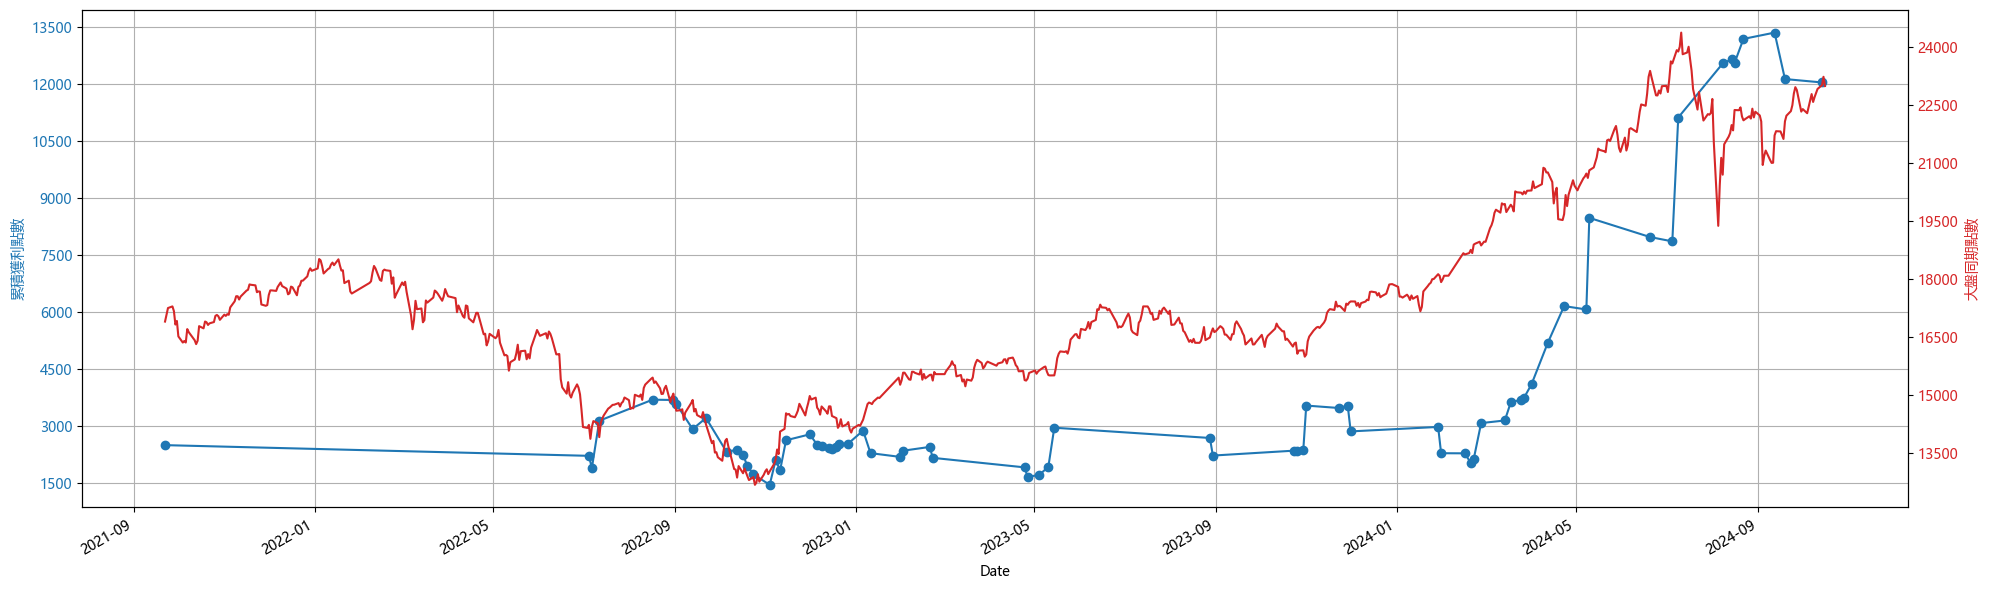

In [30]:
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib.ticker import MaxNLocator

# ÂêåÊúüÂ§ßÁõ§Ë≥áÊñô 
tx_df = merged_df[( merged_df['Date'] >=  earm_data2_bs1['buy_date'].iloc[0]) & (merged_df['Date'] <= earm_data2_bs1['sell_date'].iloc[-1])]

print('===Â§ßÁõ§Á¥ØÁ©ç====')
print(tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[-1] - tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0])

print('===Â§ñË≥áÂ∞èÂÖíÊ≥ïÁ¥ØÁ©ç====')
print(earm_data2_bs1['earn'].cumsum().iloc[-1])

print('===ÈÄ≤Âá∫Ê¨°Êï∏====')
print(len(earm_data2_bs1))

print('===Á¨¨‰∏ÄÊ¨°Ë≤∑ÈÄ≤===')
print(earm_data2_bs1['buy_date'].iloc[0])

print('===ÊúÄÂæå‰∏ÄÊ¨°Ë≥£Âá∫===')
print(earm_data2_bs1['sell_date'].iloc[-1])

# Ë®≠ÁΩÆ‰∏≠ÊñáÂ≠óÈ´î
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # ‰ΩøÁî®ÂæÆËªüÊ≠£ÈªëÈ´î (ÂèØÊ†πÊìöÁ≥ªÁµ±Â≠óÈ´îÈÅ∏Êìá)
plt.rcParams['axes.unicode_minus'] = False  # Ëß£Ê±∫Ë≤†ËôüÈ°ØÁ§∫ÂïèÈ°å


# ÂÅáË®≠ 'Date' Â∑≤Á∂ìÊòØÊó•ÊúüÊ†ºÂºè
fig, ax1 = plt.subplots(figsize=(20, 6))

# Á¨¨‰∏ÄÊ¢ùÁ∑ö - ÊúÄÂæåÊàê‰∫§ÂÉπ
ax1.set_xlabel('Date')
ax1.set_ylabel('Á¥ØÁ©çÁç≤Âà©ÈªûÊï∏', color='tab:blue')
ax1.plot(earm_data2_bs1['buy_date'], earm_data2_bs1['earn'].cumsum(), color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# ÈñãÂïüÁ∂≤Ê†º
ax1.grid(True)
# Ë™øÊï¥ Y Ëª∏ÈñìË∑ù (Ë®≠ÂÆöÊõ¥Â§öÊ®ôÁ±§)
ax1.yaxis.set_major_locator(MaxNLocator(prune=None, nbins=10))  # Â¢ûÂä† Y Ëª∏Ê®ôÁ±§Êï∏Èáè

# Âª∫Á´ãÁ¨¨‰∫åÂÄãYËª∏
ax2 = ax1.twinx()  
ax2.set_ylabel('Â§ßÁõ§ÂêåÊúüÈªûÊï∏', color='tab:red')  # ÂèØ‰ª•Ê†πÊìöÈúÄË¶ÅË™øÊï¥Ê®ôÁ±§
ax2.plot(tx_df['Date'], tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Ë™øÊï¥Á¨¨‰∫åÂÄã Y Ëª∏ÈñìË∑ù (ÂêåÊ®£Ë®≠ÂÆöÊõ¥Â§öÊ®ôÁ±§)
ax2.yaxis.set_major_locator(MaxNLocator(prune=None, nbins=10))  # Â¢ûÂä† Y Ëª∏Ê®ôÁ±§Êï∏Èáè

# ÊóãËΩâÊó•ÊúüÊ®ôÁ±§
fig.autofmt_xdate()

# È°ØÁ§∫ÂúñË°®
fig.tight_layout()
plt.show()


In [87]:
import numpy as np
import warnings
# Ë®àÁÆóË®äËôüÂá∫‰æÜÂæåÈöîÂ§©ÈñãÁõ§Áõ¥Êé•Ë≤∑
# Âá∫Â†¥Ë®äËôüÂá∫‰æÜÂæå ÈöîÂ§©ÈñãÁõ§Áõ¥Êé•Ë≥£
# ÂøΩÁï• FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

MA = '10MA'

tx_df_raw = tx_df_raw[tx_df_raw[MA] != 0]
# tx_df_raw[tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >= tx_df_raw['10MA']]
tif_investors_df_raw['Â∞èÂ§ñË≥áËÆäÂåñ'] = tif_investors_df_raw['Â∞èÂ§ñË≥á'].diff(1)
tif_investors_df_raw.dropna()

# ‰ΩøÁî® 'Date' Ê¨Ñ‰ΩçÈÄ≤Ë°åÂÖßÈÉ®ÈÄ£Êé•
merged_df = pd.merge(tif_investors_df_raw, tx_df_raw, on='Date', how='inner')

merged_df['hold'] = np.nan

# Ê¢ù‰ª∂ÂñÆÂú®ÈÄôÈÇä‰∏ã

condition_buy = ((merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >=  merged_df[MA]) & (merged_df['Â∞èÂ§ñË≥áËÆäÂåñ'] > 0))

condition_sell = (merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] <  merged_df[MA])

merged_df.loc[condition_buy, 'hold'] = 1
merged_df.loc[condition_sell, 'hold'] = 0

merged_df['hold'].ffill(inplace=True)
merged_df['hold'] = merged_df['hold'].fillna(0)

# Ë®àÁÆóÈÄ≤Âá∫

day_list = merged_df['Date'].unique().tolist()[:-1] # ÊéíÈô§‰ªäÂ§©
earm_data1 = pd.DataFrame(columns=['buy_date','sell_date','buy_open','sell_open','earn'])

sell_date = pd.to_datetime("1911-01-01")  # Example Timestamp

for day in day_list:
        today_str = day.strftime('%Y-%m-%d')
        stock_df_today = merged_df[merged_df['Date'] == today_str].copy() 

        if((stock_df_today['hold'].iloc[0] == 1) & ( pd.to_datetime(today_str) > sell_date)): # Á¨¶ÂêàÊ¢ù‰ª∂Á¨¨‰∏ÄÂ§©

                close = merged_df[merged_df['Date'] > today_str]['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0] 
                ma10 = merged_df[merged_df['Date'] > today_str][MA].iloc[0] 

                if (close >=  ma10):
                        #ÈöîÂ§©Êî∂Áõ§Ë¶ÅÁ´ô‰∏äÂÜçË≤∑ÈÄ≤
                        buy_close = merged_df[merged_df['Date'] > today_str]['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0] 
                        buy_date = merged_df[merged_df['Date'] > today_str]['Date'].iloc[0] 


                        #Ë∑åÁ†¥maÁï∂Â§©

                        if(len(merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]) > 0):
                                sell_open = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0] 
                                sell_date = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['Date'].iloc[0] 
                                sell_date = pd.to_datetime(sell_date)

                                earn = sell_open - buy_close

                                result_df = pd.DataFrame({
                                        'buy_date': [buy_date],
                                        'sell_date': [sell_date],
                                        'buy_open': [buy_close],
                                        'sell_open': [sell_open],
                                        'earn': [earn]
                                        })

                                # Âà†Èô§ÂÖ®‰∏∫NAÁöÑÂàóÔºåÈÅøÂÖçÂèØËÉΩÂá∫Áé∞ÁöÑË≠¶Âëä
                                result_df.dropna(axis=1, how='all', inplace=True)

                                if not result_df.empty:
                                        earm_data1 = pd.concat([earm_data1, result_df], ignore_index=True)
                        else:
                                continue

        
# earm_data1['cumsum'] = earm_data1['earn'].cumsum()
# earm_data1



In [ ]:
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib.ticker import MaxNLocator

# ÂêåÊúüÂ§ßÁõ§Ë≥áÊñô 
tx_df = merged_df[( merged_df['Date'] >=  earm_data1['buy_date'].iloc[0]) & (merged_df['Date'] <= earm_data1['sell_date'].iloc[-1])]

print('===Â§ßÁõ§Á¥ØÁ©ç====')
print(tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[-1] - tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0])

print('===Â§ñË≥áÂ∞èÂÖíÊ≥ïÁ¥ØÁ©ç====')
print(earm_data1['earn'].cumsum().iloc[-1])

print('===ÈÄ≤Âá∫Ê¨°Êï∏====')
print(len(earm_data1))

print('===Á¨¨‰∏ÄÊ¨°Ë≤∑ÈÄ≤===')
print(earm_data1['buy_date'].iloc[0])

print('===ÊúÄÂæå‰∏ÄÊ¨°Ë≥£Âá∫===')
print(earm_data1['sell_date'].iloc[-1])

# Ë®≠ÁΩÆ‰∏≠ÊñáÂ≠óÈ´î
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # ‰ΩøÁî®ÂæÆËªüÊ≠£ÈªëÈ´î (ÂèØÊ†πÊìöÁ≥ªÁµ±Â≠óÈ´îÈÅ∏Êìá)
plt.rcParams['axes.unicode_minus'] = False  # Ëß£Ê±∫Ë≤†ËôüÈ°ØÁ§∫ÂïèÈ°å


# ÂÅáË®≠ 'Date' Â∑≤Á∂ìÊòØÊó•ÊúüÊ†ºÂºè
fig, ax1 = plt.subplots(figsize=(20, 6))

# Á¨¨‰∏ÄÊ¢ùÁ∑ö - ÊúÄÂæåÊàê‰∫§ÂÉπ
ax1.set_xlabel('Date')
ax1.set_ylabel('Á¥ØÁ©çÁç≤Âà©ÈªûÊï∏', color='tab:blue')
ax1.plot(earm_data1['buy_date'], earm_data1['earn'].cumsum(), color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# ÈñãÂïüÁ∂≤Ê†º
ax1.grid(True)
# Ë™øÊï¥ Y Ëª∏ÈñìË∑ù (Ë®≠ÂÆöÊõ¥Â§öÊ®ôÁ±§)
ax1.yaxis.set_major_locator(MaxNLocator(prune=None, nbins=10))  # Â¢ûÂä† Y Ëª∏Ê®ôÁ±§Êï∏Èáè

# Âª∫Á´ãÁ¨¨‰∫åÂÄãYËª∏
ax2 = ax1.twinx()  
ax2.set_ylabel('Â§ßÁõ§ÂêåÊúüÈªûÊï∏', color='tab:red')  # ÂèØ‰ª•Ê†πÊìöÈúÄË¶ÅË™øÊï¥Ê®ôÁ±§
ax2.plot(tx_df['Date'], tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Ë™øÊï¥Á¨¨‰∫åÂÄã Y Ëª∏ÈñìË∑ù (ÂêåÊ®£Ë®≠ÂÆöÊõ¥Â§öÊ®ôÁ±§)
ax2.yaxis.set_major_locator(MaxNLocator(prune=None, nbins=10))  # Â¢ûÂä† Y Ëª∏Ê®ôÁ±§Êï∏Èáè

# ÊóãËΩâÊó•ÊúüÊ®ôÁ±§
fig.autofmt_xdate()

# È°ØÁ§∫ÂúñË°®
fig.tight_layout()
plt.show()


In [28]:
# merged_df[(merged_df['Date'] >= '2024-07-01') & (merged_df['Date'] <= '2024-07-10')][['Date', 'ÈñãÁõ§ÂÉπ' ,'ÊúÄÂæåÊàê‰∫§ÂÉπ','Â∞èÂ§ñË≥áËÆäÂåñ' ,'10MA','hold']]
#merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > '2024-06-28')][['Date', 'ÈñãÁõ§ÂÉπ' ,'ÊúÄÂæåÊàê‰∫§ÂÉπ','Â∞èÂ§ñË≥áËÆäÂåñ' ,'10MA','hold']]

===Â§ßÁõ§Á¥ØÁ©ç====
5404.0
===Â§ñË≥áÂ∞èÂÖíÊ≥ïÁ¥ØÁ©ç====
7610.0
===ÈÄ≤Âá∫Ê¨°Êï∏====
125
===Á¨¨‰∏ÄÊ¨°Ë≤∑ÈÄ≤===
2021-09-17 00:00:00
===ÊúÄÂæå‰∏ÄÊ¨°Ë≥£Âá∫===
2024-10-09 00:00:00


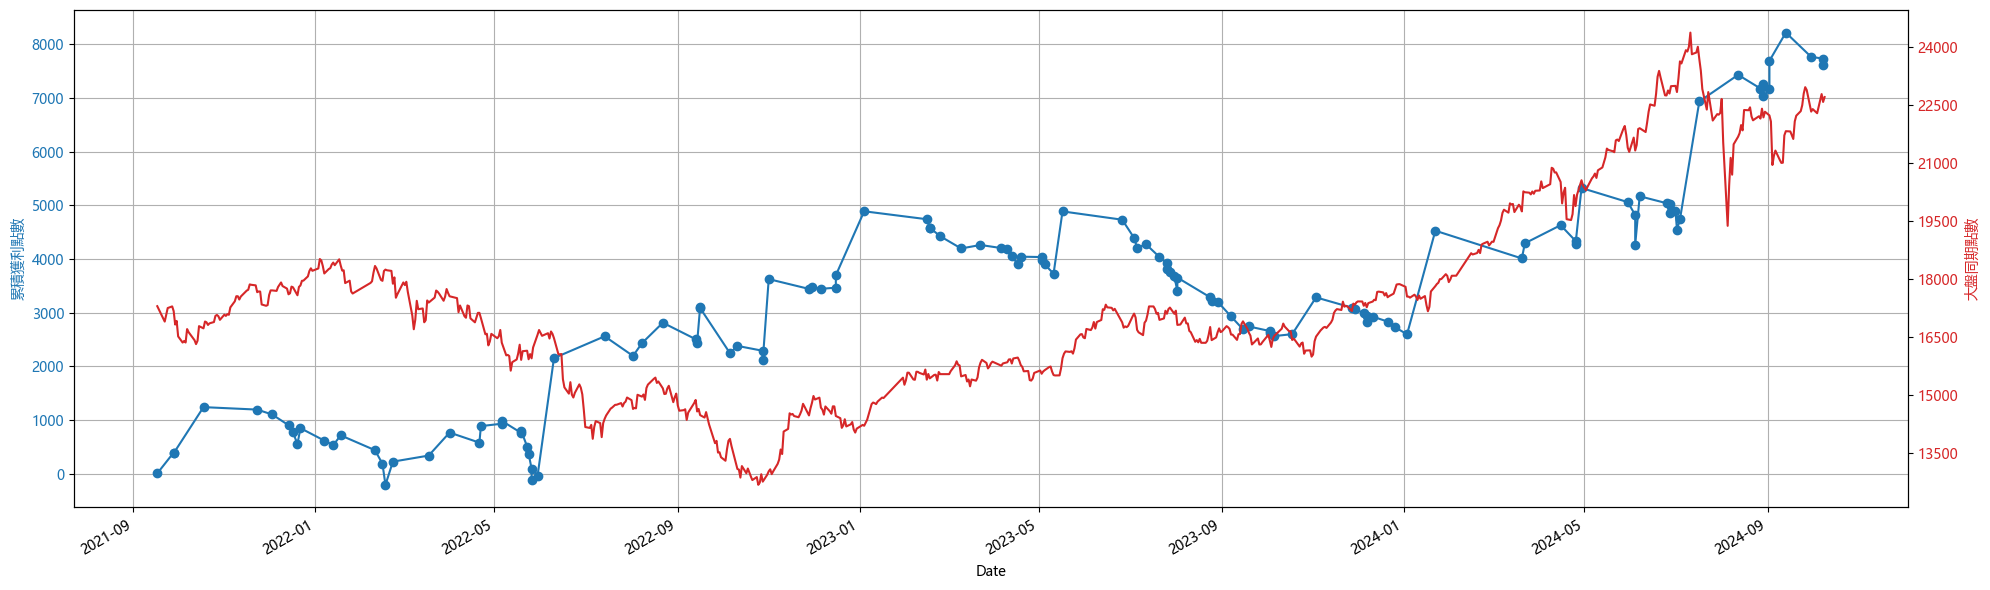

In [37]:
import numpy as np
import warnings
# Â¶ÇÊûúÂñÆÁ¥îÁúã10MA‰∏çÁÆ°Â∞èÂ§ñË≥á 
# ÂøΩÁï• FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

MA = '10MA'

tx_df_raw = tx_df_raw[tx_df_raw[MA] != 0]
# tx_df_raw[tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >= tx_df_raw['10MA']]
tif_investors_df_raw['Â∞èÂ§ñË≥áËÆäÂåñ'] = tif_investors_df_raw['Â∞èÂ§ñË≥á'].diff(1)
tif_investors_df_raw.dropna()

# ‰ΩøÁî® 'Date' Ê¨Ñ‰ΩçÈÄ≤Ë°åÂÖßÈÉ®ÈÄ£Êé•
merged_df = pd.merge(tif_investors_df_raw, tx_df_raw, on='Date', how='inner')

merged_df['hold'] = np.nan

condition_buy = ((merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] <  merged_df[MA]))  

condition_sell = (merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >=  merged_df[MA])

merged_df.loc[condition_buy, 'hold'] = 1
merged_df.loc[condition_sell, 'hold'] = 0

merged_df['hold'].ffill(inplace=True)
merged_df['hold'] = merged_df['hold'].fillna(0)

# Ë®àÁÆóÈÄ≤Âá∫

day_list = merged_df['Date'].unique().tolist()[:-1] # ÊéíÈô§‰ªäÂ§©
earm_data2_sell = pd.DataFrame(columns=['today_str','buy_date','sell_date','buy_open','sell_open','earn','type'])

sell_date = pd.to_datetime("1911-01-01")  # Example Timestamp

for day in day_list:
        today_str = day.strftime('%Y-%m-%d')
        stock_df_today = merged_df[merged_df['Date'] == today_str].copy() 

        if((stock_df_today['hold'].iloc[0] == 1) & ( pd.to_datetime(today_str) > sell_date)): # Á¨¶ÂêàÊ¢ù‰ª∂Á¨¨‰∏ÄÂ§©
                
                buy_df = merged_df[merged_df['Date'] == today_str]

                if (len(buy_df) > 0):
                        # Êî∂Áõ§Ë∑åÁ†¥ÂçÅÊó•Á∑öÁõ¥Êé•ÈñãÁ©∫ ‰∏çÂõâÂó¶
                        buy_open = merged_df[merged_df['Date'] == today_str]['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0] 
                        buy_date = merged_df[merged_df['Date'] == today_str]['Date'].iloc[0] 

                        sell_df = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]
                        
                        if (len(sell_df) >1 ):
                                
                                #Ë∑åÁ†¥maÁï∂Â§©
                                if(len(merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]) > 0):
                                        sell_open = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0] 
                                        sell_date = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['Date'].iloc[0] 
                                        sell_date = pd.to_datetime(sell_date)
                                        # ÂÅöÁ©∫ÂÄíÈÅé‰æÜ
                                        earn = buy_open - sell_open 

                                        result_df = pd.DataFrame({
                                                'today_str' : [today_str],
                                                'buy_date': [buy_date],
                                                'sell_date': [sell_date],
                                                'buy_open': [buy_open],
                                                'sell_open': [sell_open],
                                                'earn': [earn],
                                                'type' : ['s']
                                                })

                                        # Âà†Èô§ÂÖ®‰∏∫NAÁöÑÂàóÔºåÈÅøÂÖçÂèØËÉΩÂá∫Áé∞ÁöÑË≠¶Âëä
                                        result_df.dropna(axis=1, how='all', inplace=True)

                                        if not result_df.empty:
                                                earm_data2_sell = pd.concat([earm_data2_sell, result_df], ignore_index=True)


# ÂÅöÂ§ö ==========================================================================================================================

tx_df_raw = tx_df_raw[tx_df_raw[MA] != 0]
# tx_df_raw[tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >= tx_df_raw['10MA']]
tif_investors_df_raw['Â∞èÂ§ñË≥áËÆäÂåñ'] = tif_investors_df_raw['Â∞èÂ§ñË≥á'].diff(1)
tif_investors_df_raw.dropna()

# ‰ΩøÁî® 'Date' Ê¨Ñ‰ΩçÈÄ≤Ë°åÂÖßÈÉ®ÈÄ£Êé•
merged_df = pd.merge(tif_investors_df_raw, tx_df_raw, on='Date', how='inner')

merged_df['hold'] = np.nan

condition_buy = ((merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >=  merged_df[MA]))

condition_sell = (merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] <  merged_df[MA])

merged_df.loc[condition_buy, 'hold'] = 1
merged_df.loc[condition_sell, 'hold'] = 0

merged_df['hold'].ffill(inplace=True)
merged_df['hold'] = merged_df['hold'].fillna(0)

# Ë®àÁÆóÈÄ≤Âá∫

day_list = merged_df['Date'].unique().tolist()[:-1] # ÊéíÈô§‰ªäÂ§©
earm_data2_buy = pd.DataFrame(columns=['today_str' ,'buy_date','sell_date','buy_open','sell_open','earn','type'])

sell_date = pd.to_datetime("1911-01-01")  # Example Timestamp

for day in day_list:
        today_str = day.strftime('%Y-%m-%d')
        stock_df_today = merged_df[merged_df['Date'] == today_str].copy() 

        if((stock_df_today['hold'].iloc[0] == 1) & ( pd.to_datetime(today_str) > sell_date)): # Á¨¶ÂêàÊ¢ù‰ª∂Á¨¨‰∏ÄÂ§©
                #ÈöîÂ§©ÈñãÁõ§ÂÉπË≤∑ÈÄ≤
                buy_open = merged_df[merged_df['Date'] > today_str]['ÈñãÁõ§ÂÉπ'].iloc[0] 
                buy_date = merged_df[merged_df['Date'] > today_str]['Date'].iloc[0] 


                #Ë∑åÁ†¥maÁï∂Â§©
                if(len(merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]) > 0):
                        sell_open = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0] 
                        sell_date = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['Date'].iloc[0] 
                        sell_date = pd.to_datetime(sell_date)

                        earn = sell_open - buy_open

                        result_df = pd.DataFrame({
                                'today_str' : [today_str],
                                'buy_date': [buy_date],
                                'sell_date': [sell_date],
                                'buy_open': [buy_open],
                                'sell_open': [sell_open],
                                'earn': [earn],
                                'type': ['b']
                                })

                        # Âà†Èô§ÂÖ®‰∏∫NAÁöÑÂàóÔºåÈÅøÂÖçÂèØËÉΩÂá∫Áé∞ÁöÑË≠¶Âëä
                        result_df.dropna(axis=1, how='all', inplace=True)

                        if not result_df.empty:
                                earm_data2_buy = pd.concat([earm_data2_buy, result_df], ignore_index=True)

        
earm_data2_bs1 = pd.concat([earm_data2_buy, earm_data2_sell],axis=0, ignore_index=True).sort_values(by='buy_date')
earm_data2_bs1['earncumsum'] = earm_data2_bs1['earn'].cumsum()
#earm_data2_bs[(earm_data2_bs['today_str'] >= '2024-06-01') & (earm_data2_bs['today_str'] <= '2024-12-01')]

earm_data2_bs1

import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib.ticker import MaxNLocator

# ÂêåÊúüÂ§ßÁõ§Ë≥áÊñô 
tx_df = merged_df[( merged_df['Date'] >=  earm_data2_bs1['buy_date'].iloc[0]) & (merged_df['Date'] <= earm_data2_bs1['sell_date'].iloc[-1])]

print('===Â§ßÁõ§Á¥ØÁ©ç====')
print(tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[-1] - tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0])

print('===Â§ñË≥áÂ∞èÂÖíÊ≥ïÁ¥ØÁ©ç====')
print(earm_data2_bs1['earn'].cumsum().iloc[-1])

print('===ÈÄ≤Âá∫Ê¨°Êï∏====')
print(len(earm_data2_bs1))

print('===Á¨¨‰∏ÄÊ¨°Ë≤∑ÈÄ≤===')
print(earm_data2_bs1['buy_date'].iloc[0])

print('===ÊúÄÂæå‰∏ÄÊ¨°Ë≥£Âá∫===')
print(earm_data2_bs1['sell_date'].iloc[-1])

# Ë®≠ÁΩÆ‰∏≠ÊñáÂ≠óÈ´î
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # ‰ΩøÁî®ÂæÆËªüÊ≠£ÈªëÈ´î (ÂèØÊ†πÊìöÁ≥ªÁµ±Â≠óÈ´îÈÅ∏Êìá)
plt.rcParams['axes.unicode_minus'] = False  # Ëß£Ê±∫Ë≤†ËôüÈ°ØÁ§∫ÂïèÈ°å


# ÂÅáË®≠ 'Date' Â∑≤Á∂ìÊòØÊó•ÊúüÊ†ºÂºè
fig, ax1 = plt.subplots(figsize=(20, 6))

# Á¨¨‰∏ÄÊ¢ùÁ∑ö - ÊúÄÂæåÊàê‰∫§ÂÉπ
ax1.set_xlabel('Date')
ax1.set_ylabel('Á¥ØÁ©çÁç≤Âà©ÈªûÊï∏', color='tab:blue')
ax1.plot(earm_data2_bs1['buy_date'], earm_data2_bs1['earn'].cumsum(), color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# ÈñãÂïüÁ∂≤Ê†º
ax1.grid(True)
# Ë™øÊï¥ Y Ëª∏ÈñìË∑ù (Ë®≠ÂÆöÊõ¥Â§öÊ®ôÁ±§)
ax1.yaxis.set_major_locator(MaxNLocator(prune=None, nbins=10))  # Â¢ûÂä† Y Ëª∏Ê®ôÁ±§Êï∏Èáè

# Âª∫Á´ãÁ¨¨‰∫åÂÄãYËª∏
ax2 = ax1.twinx()  
ax2.set_ylabel('Â§ßÁõ§ÂêåÊúüÈªûÊï∏', color='tab:red')  # ÂèØ‰ª•Ê†πÊìöÈúÄË¶ÅË™øÊï¥Ê®ôÁ±§
ax2.plot(tx_df['Date'], tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Ë™øÊï¥Á¨¨‰∫åÂÄã Y Ëª∏ÈñìË∑ù (ÂêåÊ®£Ë®≠ÂÆöÊõ¥Â§öÊ®ôÁ±§)
ax2.yaxis.set_major_locator(MaxNLocator(prune=None, nbins=10))  # Â¢ûÂä† Y Ëª∏Ê®ôÁ±§Êï∏Èáè

# ÊóãËΩâÊó•ÊúüÊ®ôÁ±§
fig.autofmt_xdate()

# È°ØÁ§∫ÂúñË°®
fig.tight_layout()
plt.show()


Áõ¥Êé•Áúã Â§ßÁõ§ÂçÅÊó•Á∑ö ÂçÅÊó•‰ª•‰∏äË≤∑ ‰ª•‰∏ãË≥£ ÂÅöÁ©∫Â§öÁúãÂ≠£Á∑ö Â≠£Á∑ö‰ª•‰∏ä‰∏çÂÅöÁ©∫

===Â§ßÁõ§Á¥ØÁ©ç====
5405.0
===Â§ñË≥áÂ∞èÂÖíÊ≥ïÁ¥ØÁ©ç====
9337.0
===ÈÄ≤Âá∫Ê¨°Êï∏====
91
===Á¨¨‰∏ÄÊ¨°Ë≤∑ÈÄ≤===
2021-09-28 00:00:00
===ÊúÄÂæå‰∏ÄÊ¨°Ë≥£Âá∫===
2024-10-08 00:00:00


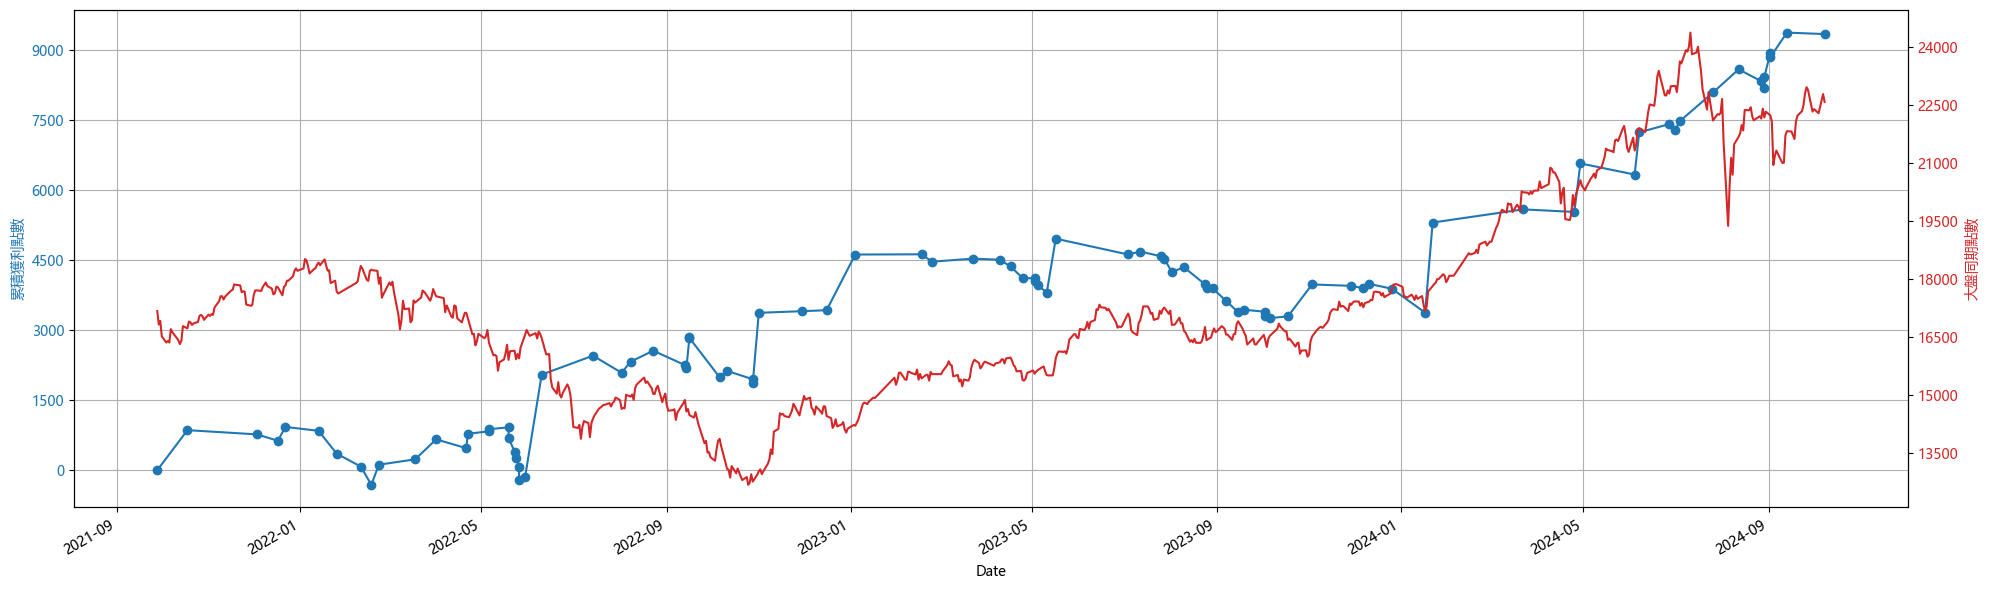

In [40]:
import numpy as np
import warnings
# Â¶ÇÊûúÂñÆÁ¥îÁúã10MA‰∏çÁÆ°Â∞èÂ§ñË≥á 
# ÂøΩÁï• FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

MA = '10MA'

tx_df_raw = tx_df_raw[tx_df_raw[MA] != 0]
# tx_df_raw[tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >= tx_df_raw['10MA']]
tif_investors_df_raw['Â∞èÂ§ñË≥áËÆäÂåñ'] = tif_investors_df_raw['Â∞èÂ§ñË≥á'].diff(1)
tif_investors_df_raw.dropna()

# ‰ΩøÁî® 'Date' Ê¨Ñ‰ΩçÈÄ≤Ë°åÂÖßÈÉ®ÈÄ£Êé•
merged_df = pd.merge(tif_investors_df_raw, tx_df_raw, on='Date', how='inner')

merged_df['hold'] = np.nan

condition_buy = ((merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] <=  merged_df[MA]) & (merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] <=  merged_df['60MA']))  # Â§öÂä†‰∏ÄÂÄãÂ≠£Á∑ö‰ª•‰∏ã

condition_sell = (merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >  merged_df[MA])

merged_df.loc[condition_buy, 'hold'] = 1
merged_df.loc[condition_sell, 'hold'] = 0

merged_df['hold'].ffill(inplace=True)
merged_df['hold'] = merged_df['hold'].fillna(0)

# Ë®àÁÆóÈÄ≤Âá∫

day_list = merged_df['Date'].unique().tolist()[:-1] # ÊéíÈô§‰ªäÂ§©
earm_data2_sell = pd.DataFrame(columns=['today_str','buy_date','sell_date','buy_open','sell_open','earn','type'])

sell_date = pd.to_datetime("1911-01-01")  # Example Timestamp

for day in day_list:
        today_str = day.strftime('%Y-%m-%d')
        stock_df_today = merged_df[merged_df['Date'] == today_str].copy() 

        if((stock_df_today['hold'].iloc[0] == 1) & ( pd.to_datetime(today_str) > sell_date)): # Á¨¶ÂêàÊ¢ù‰ª∂Á¨¨‰∏ÄÂ§©
                
                buy_df = merged_df[merged_df['Date'] == today_str]

                if (len(buy_df) > 0):
                        # Êî∂Áõ§Ë∑åÁ†¥ÂçÅÊó•Á∑öÁõ¥Êé•ÈñãÁ©∫ ‰∏çÂõâÂó¶
                        buy_open = merged_df[merged_df['Date'] == today_str]['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0] 
                        buy_date = merged_df[merged_df['Date'] == today_str]['Date'].iloc[0] 

                        sell_df = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]
                        
                        if (len(sell_df) >1 ):
                                
                                #Ë∑åÁ†¥maÁï∂Â§©
                                if(len(merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]) > 0):
                                        sell_open = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0] 
                                        sell_date = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['Date'].iloc[0] 
                                        sell_date = pd.to_datetime(sell_date)
                                        # ÂÅöÁ©∫ÂÄíÈÅé‰æÜ
                                        earn = buy_open - sell_open 

                                        result_df = pd.DataFrame({
                                                'today_str' : [today_str],
                                                'buy_date': [buy_date],
                                                'sell_date': [sell_date],
                                                'buy_open': [buy_open],
                                                'sell_open': [sell_open],
                                                'earn': [earn],
                                                'type' : ['s']
                                                })

                                        # Âà†Èô§ÂÖ®‰∏∫NAÁöÑÂàóÔºåÈÅøÂÖçÂèØËÉΩÂá∫Áé∞ÁöÑË≠¶Âëä
                                        result_df.dropna(axis=1, how='all', inplace=True)

                                        if not result_df.empty:
                                                earm_data2_sell = pd.concat([earm_data2_sell, result_df], ignore_index=True)


# ÂÅöÂ§ö ==========================================================================================================================

tx_df_raw = tx_df_raw[tx_df_raw[MA] != 0]
# tx_df_raw[tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >= tx_df_raw['10MA']]
tif_investors_df_raw['Â∞èÂ§ñË≥áËÆäÂåñ'] = tif_investors_df_raw['Â∞èÂ§ñË≥á'].diff(1)
tif_investors_df_raw.dropna()

# ‰ΩøÁî® 'Date' Ê¨Ñ‰ΩçÈÄ≤Ë°åÂÖßÈÉ®ÈÄ£Êé•
merged_df = pd.merge(tif_investors_df_raw, tx_df_raw, on='Date', how='inner')

merged_df['hold'] = np.nan

condition_buy = ((merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >=  merged_df[MA]))

condition_sell = (merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] <  merged_df[MA])

merged_df.loc[condition_buy, 'hold'] = 1
merged_df.loc[condition_sell, 'hold'] = 0

merged_df['hold'].ffill(inplace=True)
merged_df['hold'] = merged_df['hold'].fillna(0)

# Ë®àÁÆóÈÄ≤Âá∫

day_list = merged_df['Date'].unique().tolist()[:-1] # ÊéíÈô§‰ªäÂ§©
earm_data2_buy = pd.DataFrame(columns=['today_str' ,'buy_date','sell_date','buy_open','sell_open','earn','type'])

sell_date = pd.to_datetime("1911-01-01")  # Example Timestamp

for day in day_list:
        today_str = day.strftime('%Y-%m-%d')
        stock_df_today = merged_df[merged_df['Date'] == today_str].copy() 

        if((stock_df_today['hold'].iloc[0] == 1) & ( pd.to_datetime(today_str) > sell_date)): # Á¨¶ÂêàÊ¢ù‰ª∂Á¨¨‰∏ÄÂ§©
                #ÈöîÂ§©ÈñãÁõ§ÂÉπË≤∑ÈÄ≤
                buy_open = merged_df[merged_df['Date'] > today_str]['ÈñãÁõ§ÂÉπ'].iloc[0] 
                buy_date = merged_df[merged_df['Date'] > today_str]['Date'].iloc[0] 


                #Ë∑åÁ†¥maÁï∂Â§©
                if(len(merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]) > 0):
                        sell_open = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0] 
                        sell_date = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['Date'].iloc[0] 
                        sell_date = pd.to_datetime(sell_date)

                        earn = sell_open - buy_open

                        result_df = pd.DataFrame({
                                'today_str' : [today_str],
                                'buy_date': [buy_date],
                                'sell_date': [sell_date],
                                'buy_open': [buy_open],
                                'sell_open': [sell_open],
                                'earn': [earn],
                                'type': ['b']
                                })

                        # Âà†Èô§ÂÖ®‰∏∫NAÁöÑÂàóÔºåÈÅøÂÖçÂèØËÉΩÂá∫Áé∞ÁöÑË≠¶Âëä
                        result_df.dropna(axis=1, how='all', inplace=True)

                        if not result_df.empty:
                                earm_data2_buy = pd.concat([earm_data2_buy, result_df], ignore_index=True)

        
earm_data2_bs1 = pd.concat([earm_data2_buy, earm_data2_sell],axis=0, ignore_index=True).sort_values(by='buy_date')
earm_data2_bs1['earncumsum'] = earm_data2_bs1['earn'].cumsum()
#earm_data2_bs[(earm_data2_bs['today_str'] >= '2024-06-01') & (earm_data2_bs['today_str'] <= '2024-12-01')]

earm_data2_bs1

import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib.ticker import MaxNLocator

# ÂêåÊúüÂ§ßÁõ§Ë≥áÊñô 
tx_df = merged_df[( merged_df['Date'] >=  earm_data2_bs1['buy_date'].iloc[0]) & (merged_df['Date'] <= earm_data2_bs1['sell_date'].iloc[-1])]

print('===Â§ßÁõ§Á¥ØÁ©ç====')
print(tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[-1] - tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0])

print('===Â§ñË≥áÂ∞èÂÖíÊ≥ïÁ¥ØÁ©ç====')
print(earm_data2_bs1['earn'].cumsum().iloc[-1])

print('===ÈÄ≤Âá∫Ê¨°Êï∏====')
print(len(earm_data2_bs1))

print('===Á¨¨‰∏ÄÊ¨°Ë≤∑ÈÄ≤===')
print(earm_data2_bs1['buy_date'].iloc[0])

print('===ÊúÄÂæå‰∏ÄÊ¨°Ë≥£Âá∫===')
print(earm_data2_bs1['sell_date'].iloc[-1])

# Ë®≠ÁΩÆ‰∏≠ÊñáÂ≠óÈ´î
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # ‰ΩøÁî®ÂæÆËªüÊ≠£ÈªëÈ´î (ÂèØÊ†πÊìöÁ≥ªÁµ±Â≠óÈ´îÈÅ∏Êìá)
plt.rcParams['axes.unicode_minus'] = False  # Ëß£Ê±∫Ë≤†ËôüÈ°ØÁ§∫ÂïèÈ°å


# ÂÅáË®≠ 'Date' Â∑≤Á∂ìÊòØÊó•ÊúüÊ†ºÂºè
fig, ax1 = plt.subplots(figsize=(20, 6))

# Á¨¨‰∏ÄÊ¢ùÁ∑ö - ÊúÄÂæåÊàê‰∫§ÂÉπ
ax1.set_xlabel('Date')
ax1.set_ylabel('Á¥ØÁ©çÁç≤Âà©ÈªûÊï∏', color='tab:blue')
ax1.plot(earm_data2_bs1['buy_date'], earm_data2_bs1['earn'].cumsum(), color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# ÈñãÂïüÁ∂≤Ê†º
ax1.grid(True)
# Ë™øÊï¥ Y Ëª∏ÈñìË∑ù (Ë®≠ÂÆöÊõ¥Â§öÊ®ôÁ±§)
ax1.yaxis.set_major_locator(MaxNLocator(prune=None, nbins=10))  # Â¢ûÂä† Y Ëª∏Ê®ôÁ±§Êï∏Èáè

# Âª∫Á´ãÁ¨¨‰∫åÂÄãYËª∏
ax2 = ax1.twinx()  
ax2.set_ylabel('Â§ßÁõ§ÂêåÊúüÈªûÊï∏', color='tab:red')  # ÂèØ‰ª•Ê†πÊìöÈúÄË¶ÅË™øÊï¥Ê®ôÁ±§
ax2.plot(tx_df['Date'], tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Ë™øÊï¥Á¨¨‰∫åÂÄã Y Ëª∏ÈñìË∑ù (ÂêåÊ®£Ë®≠ÂÆöÊõ¥Â§öÊ®ôÁ±§)
ax2.yaxis.set_major_locator(MaxNLocator(prune=None, nbins=10))  # Â¢ûÂä† Y Ëª∏Ê®ôÁ±§Êï∏Èáè

# ÊóãËΩâÊó•ÊúüÊ®ôÁ±§
fig.autofmt_xdate()

# È°ØÁ§∫ÂúñË°®
fig.tight_layout()
plt.show()


In [ ]:
merged_df[(merged_df['Date'] >= '2024-08-01') & (merged_df['Date'] <= '2024-10-01')][['Date', 'ÈñãÁõ§ÂÉπ' ,'ÊúÄÂæåÊàê‰∫§ÂÉπ','Â∞èÂ§ñË≥áËÆäÂåñ' ,'10MA','hold']]

ÂõûÊ∏¨ÊåáÊï∏ÈÄ≤Âá∫

Âä†ÂÖ•Â∞èÂ§ñË≥áÁï∂‰ΩúÂ§öÁ©∫Ë®äËôü

===Â§ßÁõ§Á¥ØÁ©ç====
4648.0
===Â§ñË≥áÂ∞èÂÖíÊ≥ïÁ¥ØÁ©ç====
13053.0
===ÈÄ≤Âá∫Ê¨°Êï∏====
25
===Á¨¨‰∏ÄÊ¨°Ë≤∑ÈÄ≤===
2022-01-25 00:00:00
===ÊúÄÂæå‰∏ÄÊ¨°Ë≥£Âá∫===
2024-09-30 00:00:00


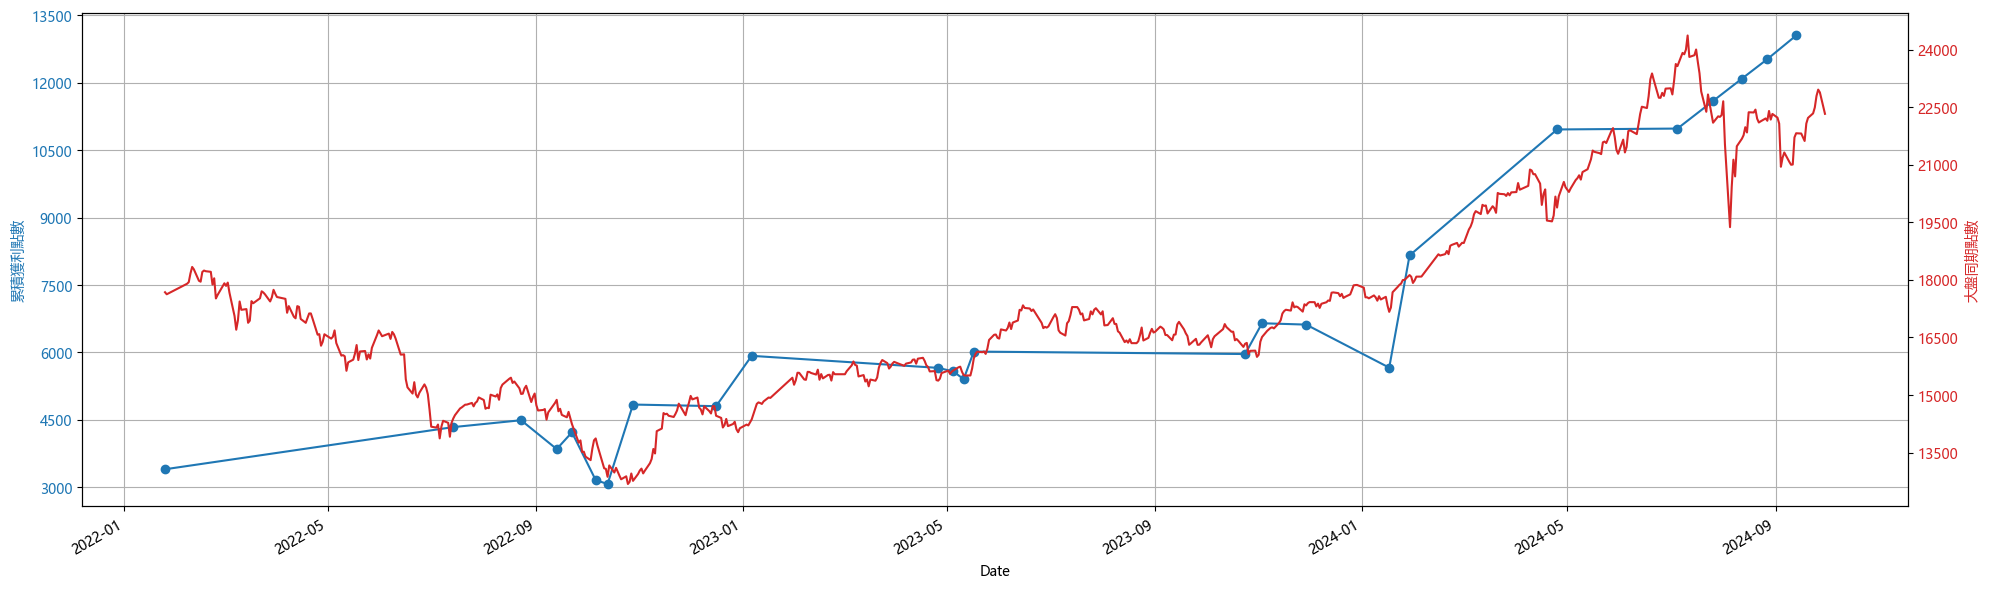

In [90]:
import numpy as np
import warnings
# ÊîπÊàêÂÅöÁ©∫

# Ë®àÁÆóË®äËôüÂá∫‰æÜÂæåÈöîÂ§©ÈñãÁõ§Áõ¥Êé•Á©∫ÁàÜ
# Âá∫Â†¥Ë®äËôüÂá∫‰æÜÂæå Êî∂Áõ§Áõ¥Êé•Ë£ú
# ÂøΩÁï• FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

MA = '10MA'

tx_df_raw = tx_df_raw[tx_df_raw[MA] != 0]
# tx_df_raw[tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >= tx_df_raw['10MA']]
tif_investors_df_raw['Â∞èÂ§ñË≥áËÆäÂåñ'] = tif_investors_df_raw['Â∞èÂ§ñË≥á'].diff(1)
tif_investors_df_raw.dropna()

# ‰ΩøÁî® 'Date' Ê¨Ñ‰ΩçÈÄ≤Ë°åÂÖßÈÉ®ÈÄ£Êé•
merged_df1 = pd.merge(tif_investors_df_raw, tx_df_raw, on='Date', how='inner')

merged_df1['hold'] = np.nan

condition_buy = ((merged_df1['ÊúÄÂæåÊàê‰∫§ÂÉπ'] <=  merged_df1[MA]) & (merged_df1['Â∞èÂ§ñË≥á'] < 0) & (merged_df1['ÊúÄÂæåÊàê‰∫§ÂÉπ'] <=  merged_df1['60MA']))  # Â§öÂä†‰∏ÄÂÄãÂ≠£Á∑ö‰ª•‰∏ã

condition_sell = ((merged_df1['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >  merged_df1[MA]) & (merged_df1['Â∞èÂ§ñË≥á'].shift(1) >= 0))

merged_df1.loc[condition_buy, 'hold'] = 1
merged_df1.loc[condition_sell, 'hold'] = 0

merged_df1['hold'].ffill(inplace=True)
merged_df1['hold'] = merged_df1['hold'].fillna(0)

# Ë®àÁÆóÈÄ≤Âá∫

day_list = merged_df1['Date'].unique().tolist()[:-1] # ÊéíÈô§‰ªäÂ§©
earm_data2_sell = pd.DataFrame(columns=['today_str','buy_date','sell_date','buy_open','sell_open','earn','type'])

sell_date = pd.to_datetime("1911-01-01")  # Example Timestamp

for day in day_list:
        today_str = day.strftime('%Y-%m-%d')
        stock_df_today = merged_df1[merged_df1['Date'] == today_str].copy() 

        if((stock_df_today['hold'].iloc[0] == 1) & ( pd.to_datetime(today_str) > sell_date)): # Á¨¶ÂêàÊ¢ù‰ª∂Á¨¨‰∏ÄÂ§©
                
                buy_df = merged_df1[merged_df1['Date'] > today_str]

                if (len(buy_df) > 0):
                        #ÈöîÂ§©ÈñãÁõ§ÂÉπË≤∑ÈÄ≤
                        # buy_open = merged_df1[merged_df1['Date'] == today_str]['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0] 
                        buy_open = merged_df1[merged_df1['Date'] > today_str]['ÈñãÁõ§ÂÉπ'].iloc[0] 
                        buy_date = merged_df1[merged_df1['Date'] >  today_str]['Date'].iloc[0] 

                        sell_df = merged_df1[(merged_df1['hold'] == 0) & (merged_df1['Date'] > today_str)]
                        
                        if (len(sell_df) >1 ):
                                
                                #Ë∑åÁ†¥maÁï∂Â§©
                                if(len(merged_df1[(merged_df1['hold'] == 0) & (merged_df1['Date'] > today_str)]) > 0):
                                        # select_day = merged_df1[(merged_df1['hold'] == 0) & (merged_df1['Date'] > today_str)]['Date'].iloc[0] 
                                        # sell_open = merged_df1[(merged_df1['Date'] > select_day)]['ÈñãÁõ§ÂÉπ'].iloc[0] 
                                        # sell_date = merged_df1[(merged_df1['Date'] > select_day)]['Date'].iloc[0]  
                                        sell_open = merged_df1[(merged_df1['hold'] == 0) & (merged_df1['Date'] > today_str)]['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0] 
                                        sell_date = merged_df1[(merged_df1['hold'] == 0) & (merged_df1['Date'] > today_str)]['Date'].iloc[0] 
                                        sell_date = pd.to_datetime(sell_date)

                                        earn = buy_open - sell_open 

                                        result_df = pd.DataFrame({
                                                'today_str' : [today_str],
                                                'buy_date': [buy_date],
                                                'sell_date': [sell_date],
                                                'buy_open': [buy_open],
                                                'sell_open': [sell_open],
                                                'earn': [earn],
                                                'type' : ['s']
                                                })

                                        # Âà†Èô§ÂÖ®‰∏∫NAÁöÑÂàóÔºåÈÅøÂÖçÂèØËÉΩÂá∫Áé∞ÁöÑË≠¶Âëä
                                        result_df.dropna(axis=1, how='all', inplace=True)

                                        if not result_df.empty:
                                                earm_data2_sell = pd.concat([earm_data2_sell, result_df], ignore_index=True)


# =================================================================================================================================================

# ÂÅöÂ§ö
# Ë®àÁÆóË®äËôüÂá∫‰æÜÂæåÈöîÂ§©ÈñãÁõ§Áõ¥Êé•Ë≤∑
# Âá∫Â†¥Ë®äËôüÂá∫‰æÜÂæå Êî∂Áõ§Áõ¥Êé•Ë≥£Âá∫

MA = '10MA'

tx_df_raw = tx_df_raw[tx_df_raw[MA] != 0]
# tx_df_raw[tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >= tx_df_raw['10MA']]
tif_investors_df_raw['Â∞èÂ§ñË≥áËÆäÂåñ'] = tif_investors_df_raw['Â∞èÂ§ñË≥á'].diff(1)
tif_investors_df_raw.dropna()

# ‰ΩøÁî® 'Date' Ê¨Ñ‰ΩçÈÄ≤Ë°åÂÖßÈÉ®ÈÄ£Êé•
merged_df = pd.merge(tif_investors_df_raw, tx_df_raw, on='Date', how='inner')

merged_df['hold'] = np.nan

condition_buy = ((merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >=  merged_df[MA]) & (merged_df['Â∞èÂ§ñË≥á'] > 0) )

condition_sell = ((merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] <  merged_df[MA]) & (merged_df['Â∞èÂ§ñË≥á'].shift(1) < 0))

merged_df.loc[condition_buy, 'hold'] = 1
merged_df.loc[condition_sell, 'hold'] = 0

merged_df['hold'].ffill(inplace=True)
merged_df['hold'] = merged_df['hold'].fillna(0)

# Ë®àÁÆóÈÄ≤Âá∫

day_list = merged_df['Date'].unique().tolist()[:-1] # ÊéíÈô§‰ªäÂ§©
earm_data2_buy = pd.DataFrame(columns=['today_str' ,'buy_date','sell_date','buy_open','sell_open','earn','type'])

sell_date = pd.to_datetime("1911-01-01")  # Example Timestamp

for day in day_list:
        today_str = day.strftime('%Y-%m-%d')
        stock_df_today = merged_df[merged_df['Date'] == today_str].copy() 

        if((stock_df_today['hold'].iloc[0] == 1) & ( pd.to_datetime(today_str) > sell_date)): # Á¨¶ÂêàÊ¢ù‰ª∂Á¨¨‰∏ÄÂ§©
                #ÈöîÂ§©ÈñãÁõ§ÂÉπË≤∑ÈÄ≤
                buy_open = merged_df[merged_df['Date'] > today_str]['ÈñãÁõ§ÂÉπ'].iloc[0] 
                buy_date = merged_df[merged_df['Date'] > today_str]['Date'].iloc[0] 


                #Ë∑åÁ†¥maÁï∂Â§©
                if(len(merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]) > 0):
                        # select_day = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['Date'].iloc[0] 
                        # sell_open = merged_df[(merged_df['Date'] > select_day)]['ÈñãÁõ§ÂÉπ'].iloc[0] 
                        # sell_date = merged_df[(merged_df['Date'] > select_day)]['Date'].iloc[0]  
                        sell_open = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0] 
                        sell_date = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['Date'].iloc[0] 
                        sell_date = pd.to_datetime(sell_date)

                        earn = sell_open - buy_open

                        result_df = pd.DataFrame({
                                'today_str' : [today_str],
                                'buy_date': [buy_date],
                                'sell_date': [sell_date],
                                'buy_open': [buy_open],
                                'sell_open': [sell_open],
                                'earn': [earn],
                                'type': ['b']
                                })

                        # Âà†Èô§ÂÖ®‰∏∫NAÁöÑÂàóÔºåÈÅøÂÖçÂèØËÉΩÂá∫Áé∞ÁöÑË≠¶Âëä
                        result_df.dropna(axis=1, how='all', inplace=True)

                        if not result_df.empty:
                                earm_data2_buy = pd.concat([earm_data2_buy, result_df], ignore_index=True)

        
# earm_data2_buy['earncumsum'] = earm_data2_buy['earn'].cumsum()
# earm_data2_buy

earm_data2_bs2 = pd.concat([earm_data2_buy, earm_data2_sell],axis=0, ignore_index=True).sort_values(by='buy_date')
earm_data2_bs2['earncumsum'] = earm_data2_bs2['earn'].cumsum()
# earm_data2_bs2

import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib.ticker import MaxNLocator

# ÂêåÊúüÂ§ßÁõ§Ë≥áÊñô 
tx_df = merged_df[( merged_df['Date'] >=  earm_data2_bs2['buy_date'].iloc[0]) & (merged_df['Date'] <= earm_data2_bs2['sell_date'].iloc[-1])]

print('===Â§ßÁõ§Á¥ØÁ©ç====')
print(tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[-1] - tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0])

print('===Â§ñË≥áÂ∞èÂÖíÊ≥ïÁ¥ØÁ©ç====')
print(earm_data2_bs2['earn'].cumsum().iloc[-1])

print('===ÈÄ≤Âá∫Ê¨°Êï∏====')
print(len(earm_data2_bs2))

print('===Á¨¨‰∏ÄÊ¨°Ë≤∑ÈÄ≤===')
print(earm_data2_bs2['buy_date'].iloc[0])

print('===ÊúÄÂæå‰∏ÄÊ¨°Ë≥£Âá∫===')
print(earm_data2_bs2['sell_date'].iloc[-1])

# Ë®≠ÁΩÆ‰∏≠ÊñáÂ≠óÈ´î
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # ‰ΩøÁî®ÂæÆËªüÊ≠£ÈªëÈ´î (ÂèØÊ†πÊìöÁ≥ªÁµ±Â≠óÈ´îÈÅ∏Êìá)
plt.rcParams['axes.unicode_minus'] = False  # Ëß£Ê±∫Ë≤†ËôüÈ°ØÁ§∫ÂïèÈ°å


# ÂÅáË®≠ 'Date' Â∑≤Á∂ìÊòØÊó•ÊúüÊ†ºÂºè
fig, ax1 = plt.subplots(figsize=(20, 6))

# Á¨¨‰∏ÄÊ¢ùÁ∑ö - ÊúÄÂæåÊàê‰∫§ÂÉπ
ax1.set_xlabel('Date')
ax1.set_ylabel('Á¥ØÁ©çÁç≤Âà©ÈªûÊï∏', color='tab:blue')
ax1.plot(earm_data2_bs2['buy_date'], earm_data2_bs2['earn'].cumsum(), color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# ÈñãÂïüÁ∂≤Ê†º
ax1.grid(True)
# Ë™øÊï¥ Y Ëª∏ÈñìË∑ù (Ë®≠ÂÆöÊõ¥Â§öÊ®ôÁ±§)
ax1.yaxis.set_major_locator(MaxNLocator(prune=None, nbins=10))  # Â¢ûÂä† Y Ëª∏Ê®ôÁ±§Êï∏Èáè

# Âª∫Á´ãÁ¨¨‰∫åÂÄãYËª∏
ax2 = ax1.twinx()  
ax2.set_ylabel('Â§ßÁõ§ÂêåÊúüÈªûÊï∏', color='tab:red')  # ÂèØ‰ª•Ê†πÊìöÈúÄË¶ÅË™øÊï¥Ê®ôÁ±§
ax2.plot(tx_df['Date'], tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Ë™øÊï¥Á¨¨‰∫åÂÄã Y Ëª∏ÈñìË∑ù (ÂêåÊ®£Ë®≠ÂÆöÊõ¥Â§öÊ®ôÁ±§)
ax2.yaxis.set_major_locator(MaxNLocator(prune=None, nbins=10))  # Â¢ûÂä† Y Ëª∏Ê®ôÁ±§Êï∏Èáè

# ÊóãËΩâÊó•ÊúüÊ®ôÁ±§
fig.autofmt_xdate()

# È°ØÁ§∫ÂúñË°®
fig.tight_layout()
plt.show()


In [87]:
earm_data2_bs2

today_str   buy_date  sell_date  buy_open  sell_open    earn type  \
15  2022-01-25 2022-01-26 2022-07-13   17683.0    14277.0  3406.0    s   
0   2022-07-13 2022-07-14 2022-08-22   14237.0    15175.0   938.0    b   
16  2022-08-23 2022-08-24 2022-09-13   15080.0    14875.0   205.0    s   
1   2022-09-12 2022-09-13 2022-09-22   14884.0    14242.0  -642.0    b   
17  2022-09-21 2022-09-22 2022-10-06   14225.0    13869.0   356.0    s   
2   2022-10-05 2022-10-06 2022-10-13   13932.0    12869.0 -1063.0    b   
18  2022-10-12 2022-10-13 2022-10-27   13032.0    12956.0    76.0    s   
3   2022-10-27 2022-10-28 2022-12-07   12855.0    14623.0  1768.0    b   
4   2022-12-15 2022-12-16 2022-12-19   14440.0    14404.0   -36.0    b   
5   2023-01-05 2023-01-06 2023-02-15   14278.0    15398.0  1120.0    b   
19  2023-04-25 2023-04-26 2023-05-05   15390.0    15643.0  -253.0    s   
6   2023-05-04 2023-05-05 2023-05-11   15598.0    15518.0   -80.0    b   
7   2023-05-16 2023-05-17 2023-10-24   15720.0    16335.0   615.0    b   
20  2023-08-25 2023-08-28 2023-08-30   16468.0    16724.0  -256.0    s   
21  2023-10-23 2023-10-24 2023-11-02   16274.0    16390.0  -116.0    s   
8   2023-11-02 2023-11-03 2023-11-27   16488.0    17173.0   685.0    b   
9   2023-11-28 2023-11-29 2023-12-05   17339.0    17309.0   -30.0    b   
22  2024-01-17 2024-01-18 2024-01-29   17240.0    18125.0  -885.0    s   
10  2024-01-26 2024-01-29 2024-04-15   18011.0    20508.0  2497.0    b   
11  2024-04-24 2024-04-25 2024-06-25   19940.0    22743.0  2803.0    b   
12  2024-07-04 2024-07-05 2024-07-17   23659.0    23679.0    20.0    b   
23  2024-07-26 2024-07-29 2024-08-09   22430.0    21481.0   949.0    s   
13  2024-08-09 2024-08-12 2024-08-27   21650.0    22146.0   496.0    b   
24  2024-08-27 2024-08-28 2024-09-12   22181.0    21711.0   470.0    s   
14  2024-09-12 2024-09-13 2024-09-30   21800.0    22326.0   526.0    b   

    earncumsum  
15      3406.0  
0       4344.0  
16      4549.0  
1       3907.0  
17      4263.0  
2       3200.0  
18      3276.0  
3       5044.0  
4       5008.0  
5       6128.0  
19      5875.0  
6       5795.0  
7       6410.0  
20      6154.0  
21      6038.0  
8       6723.0  
9       6693.0  
22      5808.0  
10      8305.0  
11     11108.0  
12     11128.0  
23     12077.0  
13     12573.0  
24     13043.0  
14     13569.0

In [85]:
tt = merged_df1[(merged_df1['ÊúÄÂæåÊàê‰∫§ÂÉπ'] < merged_df1['60MA']) & (merged_df1['Â∞èÂ§ñË≥áËÆäÂåñ'] <- 5000)]
tt[['Date', 'ÈñãÁõ§ÂÉπ' ,'ÊúÄÂæåÊàê‰∫§ÂÉπ','Â∞èÂ§ñË≥áËÆäÂåñ' ,'10MA','60MA','hold']].sort_values(by='Â∞èÂ§ñË≥áËÆäÂåñ' , ascending=True).tail(20)


tt = merged_df1[(merged_df1['Date'] >= '2022-08-20') & (merged_df1['Date'] <= '2022-10-20')][['Date', 'ÈñãÁõ§ÂÉπ' ,'ÊúÄÂæåÊàê‰∫§ÂÉπ','Â∞èÂ§ñË≥á' ,'10MA','60MA','hold']]

tt['10B'] = tt['ÊúÄÂæåÊàê‰∫§ÂÉπ'] > tt['10MA']
tt['60B']  = tt['ÊúÄÂæåÊàê‰∫§ÂÉπ'] > tt['60MA']
tt

Date      ÈñãÁõ§ÂÉπ    ÊúÄÂæåÊàê‰∫§ÂÉπ      Â∞èÂ§ñË≥á     10MA          60MA  hold    10B  \
225 2022-08-22  15171.0  15175.0  -3254.0  15245.1  15142.333333   0.0  False   
226 2022-08-23  15059.0  15028.0  -3896.0  15246.3  15116.800000   1.0  False   
227 2022-08-24  15080.0  15035.0  -5484.0  15262.2  15089.350000   1.0  False   
228 2022-08-25  15130.0  15172.0  -5574.0  15261.1  15065.383333   1.0  False   
229 2022-08-26  15271.0  15241.0  -1859.0  15258.0  15043.866667   1.0  False   
230 2022-08-29  14832.0  14818.0   -750.0  15201.1  15014.166667   1.0  False   
231 2022-08-30  14850.0  14948.0    187.0  15153.7  14988.933333   1.0  False   
232 2022-08-31  14849.0  15039.0 -11135.0  15112.4  14962.183333   1.0  False   
233 2022-09-01  14841.0  14736.0  -9346.0  15054.5  14931.416667   1.0  False   
234 2022-09-02  14776.0  14597.0 -14313.0  14978.9  14900.183333   1.0  False   
235 2022-09-05  14590.0  14611.0  -6214.0  14922.5  14876.150000   1.0  False   
236 2022-09-06  14720.0  14634.0  -2447.0  14883.1  14852.466667   1.0  False   
237 2022-09-07  14445.0  14359.0  -6635.0  14815.5  14824.083333   1.0  False   
238 2022-09-08  14459.0  14548.0  -2001.0  14753.1  14809.716667   1.0  False   
239 2022-09-12  14775.0  14794.0   1384.0  14708.4  14802.950000   1.0   True   
240 2022-09-13  14884.0  14875.0   3588.0  14714.1  14800.233333   0.0   True   
241 2022-09-14  14458.0  14577.0   5218.0  14677.0  14787.616667   0.0  False   
242 2022-09-15  14578.0  14642.0   3525.0  14637.3  14781.450000   0.0   True   
243 2022-09-16  14500.0  14483.0   2526.0  14612.0  14773.866667   0.0  False   
244 2022-09-19  14550.0  14420.0   5931.0  14594.3  14763.233333   0.0  False   
245 2022-09-20  14548.0  14561.0   5386.0  14589.3  14751.300000   0.0  False   
246 2022-09-21  14476.0  14402.0   -832.0  14566.1  14738.133333   1.0  False   
247 2022-09-22  14225.0  14242.0    -40.0  14554.4  14725.183333   1.0  False   
248 2022-09-23  14212.0  14119.0  -3468.0  14511.5  14716.800000   1.0  False   
249 2022-09-26  13916.0  13758.0  -6576.0  14407.9  14709.850000   1.0  False   
250 2022-09-27  13843.0  13818.0  -4761.0  14302.2  14704.283333   1.0  False   
251 2022-09-28  13796.0  13515.0  -2032.0  14196.0  14692.350000   1.0  False   
252 2022-09-29  13658.0  13524.0  -6276.0  14084.2  14686.566667   1.0  False   
253 2022-09-30  13356.0  13395.0  -5423.0  13975.4  14673.550000   1.0  False   
254 2022-10-03  13248.0  13304.0  -1820.0  13863.8  14656.466667   1.0  False   
255 2022-10-04  13530.0  13597.0  -5177.0  13767.4  14645.150000   1.0  False   
256 2022-10-05  13740.0  13820.0   4403.0  13709.2  14643.583333   1.0   True   
257 2022-10-06  13932.0  13869.0   1296.0  13671.9  14636.783333   0.0   True   
258 2022-10-07  13781.0  13689.0   1936.0  13628.9  14625.116667   0.0   True   
259 2022-10-11  13251.0  13091.0   1169.0  13562.2  14602.050000   0.0  False   
260 2022-10-12  13049.0  13076.0  -5832.0  13488.0  14575.816667   1.0  False   
261 2022-10-13  13032.0  12869.0   -679.0  13423.4  14545.666667   1.0  False   
262 2022-10-14  13150.0  13166.0   7403.0  13387.6  14519.900000   1.0  False   
263 2022-10-17  12964.0  12981.0   7030.0  13346.2  14490.450000   1.0  False   
264 2022-10-18  13158.0  13103.0   2860.0  13326.1  14462.983333   1.0  False   
265 2022-10-19  13125.0  12998.0  -2072.0  13266.2  14433.050000   1.0  False   
266 2022-10-20  12815.0  12900.0  -4469.0  13174.2  14402.966667   1.0  False   

       60B  
225   True  
226  False  
227  False  
228   True  
229   True  
230  False  
231  False  
232   True  
233  False  
234  False  
235  False  
236  False  
237  False  
238  False  
239  False  
240   True  
241  False  
242  False  
243  False  
244  False  
245  False  
246  False  
247  False  
248  False  
249  False  
250  False  
251  False  
252  False  
253  False  
254  False  
255  False  
256  False  
257  False  
258  False  
259  False  
260  False  
261  False  
262  False

In [53]:
import numpy as np
import warnings
# Ë®àÁÆóË®äËôüÂá∫‰æÜÂæåÈöîÂ§©ÈñãÁõ§Áõ¥Êé•Ë≤∑
# Âá∫Â†¥Ë®äËôüÂá∫‰æÜÂæå Êî∂Áõ§Áõ¥Êé•Ë≥£Âá∫
# ÂøΩÁï• FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

MA = '10MA'

tx_df_raw = tx_df_raw[tx_df_raw[MA] != 0]
# tx_df_raw[tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >= tx_df_raw['10MA']]
tif_investors_df_raw['Â∞èÂ§ñË≥áËÆäÂåñ'] = tif_investors_df_raw['Â∞èÂ§ñË≥á'].diff(1)
tif_investors_df_raw.dropna()

# ‰ΩøÁî® 'Date' Ê¨Ñ‰ΩçÈÄ≤Ë°åÂÖßÈÉ®ÈÄ£Êé•
merged_df = pd.merge(tif_investors_df_raw, tx_df_raw, on='Date', how='inner')

merged_df['hold'] = np.nan

condition_buy = ((merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >=  merged_df[MA]) & (merged_df['Â∞èÂ§ñË≥áËÆäÂåñ'] > 0) )

condition_sell = (merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] <  merged_df[MA])

merged_df.loc[condition_buy, 'hold'] = 1
merged_df.loc[condition_sell, 'hold'] = 0

merged_df['hold'].ffill(inplace=True)
merged_df['hold'] = merged_df['hold'].fillna(0)

# Ë®àÁÆóÈÄ≤Âá∫

day_list = merged_df['Date'].unique().tolist()
earm_data2_buy = pd.DataFrame(columns=['today_str' ,'buy_date','sell_date','buy_open','sell_open','earn','type'])

sell_date = pd.to_datetime("1911-01-01")  # Example Timestamp

for day in day_list:
        today_str = day.strftime('%Y-%m-%d')
        stock_df_today = merged_df[merged_df['Date'] == today_str].copy() 

        if((stock_df_today['hold'].iloc[0] == 1) & ( pd.to_datetime(today_str) > sell_date)): # Á¨¶ÂêàÊ¢ù‰ª∂Á¨¨‰∏ÄÂ§©
                #ÈöîÂ§©ÈñãÁõ§ÂÉπË≤∑ÈÄ≤
                buy_open = merged_df[merged_df['Date'] > today_str]['ÈñãÁõ§ÂÉπ'].iloc[0] 
                buy_date = merged_df[merged_df['Date'] > today_str]['Date'].iloc[0] 


                #Ë∑åÁ†¥maÁï∂Â§©
                sell_open = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0] 
                sell_date = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['Date'].iloc[0] 
                sell_date = pd.to_datetime(sell_date)

                earn = sell_open - buy_open

                result_df = pd.DataFrame({
                        'today_str' : [today_str],
                        'buy_date': [buy_date],
                        'sell_date': [sell_date],
                        'buy_open': [buy_open],
                        'sell_open': [sell_open],
                        'earn': [earn],
                        'type': ['b']
                        })

                # Âà†Èô§ÂÖ®‰∏∫NAÁöÑÂàóÔºåÈÅøÂÖçÂèØËÉΩÂá∫Áé∞ÁöÑË≠¶Âëä
                result_df.dropna(axis=1, how='all', inplace=True)

                if not result_df.empty:
                        earm_data2_buy = pd.concat([earm_data2_buy, result_df], ignore_index=True)

        
# earm_data2_buy['earncumsum'] = earm_data2_buy['earn'].cumsum()
# earm_data2_buy


In [212]:
# earm_data2
# merged_df[(merged_df['Date'] >= '2024-06-01') & (merged_df['Date'] <= '2024-08-01')][['Date', 'ÈñãÁõ§ÂÉπ' ,'ÊúÄÂæåÊàê‰∫§ÂÉπ','Â∞èÂ§ñË≥áËÆäÂåñ' ,'10MA','hold']]
# #merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > '2024-06-28')][['Date', 'ÈñãÁõ§ÂÉπ' ,'ÊúÄÂæåÊàê‰∫§ÂÉπ','Â∞èÂ§ñË≥áËÆäÂåñ' ,'10MA','hold']]

Áï´Âúñ ÂèØ‰ª•Áõ¥Êé•Áî® print_data = ÊÉ≥Áï´ÁöÑÂúñÂ∞±Ë°å‰∫Ü

===Â§ßÁõ§Á¥ØÁ©ç====
5421.0
===Â§ñË≥áÂ∞èÂÖíÊ≥ïÁ¥ØÁ©ç====
7551.0
===ÈÄ≤Âá∫Ê¨°Êï∏====
71
===Á¨¨‰∏ÄÊ¨°Ë≤∑ÈÄ≤===
2021-10-18 00:00:00
===ÊúÄÂæå‰∏ÄÊ¨°Ë≥£Âá∫===
2024-08-27 00:00:00


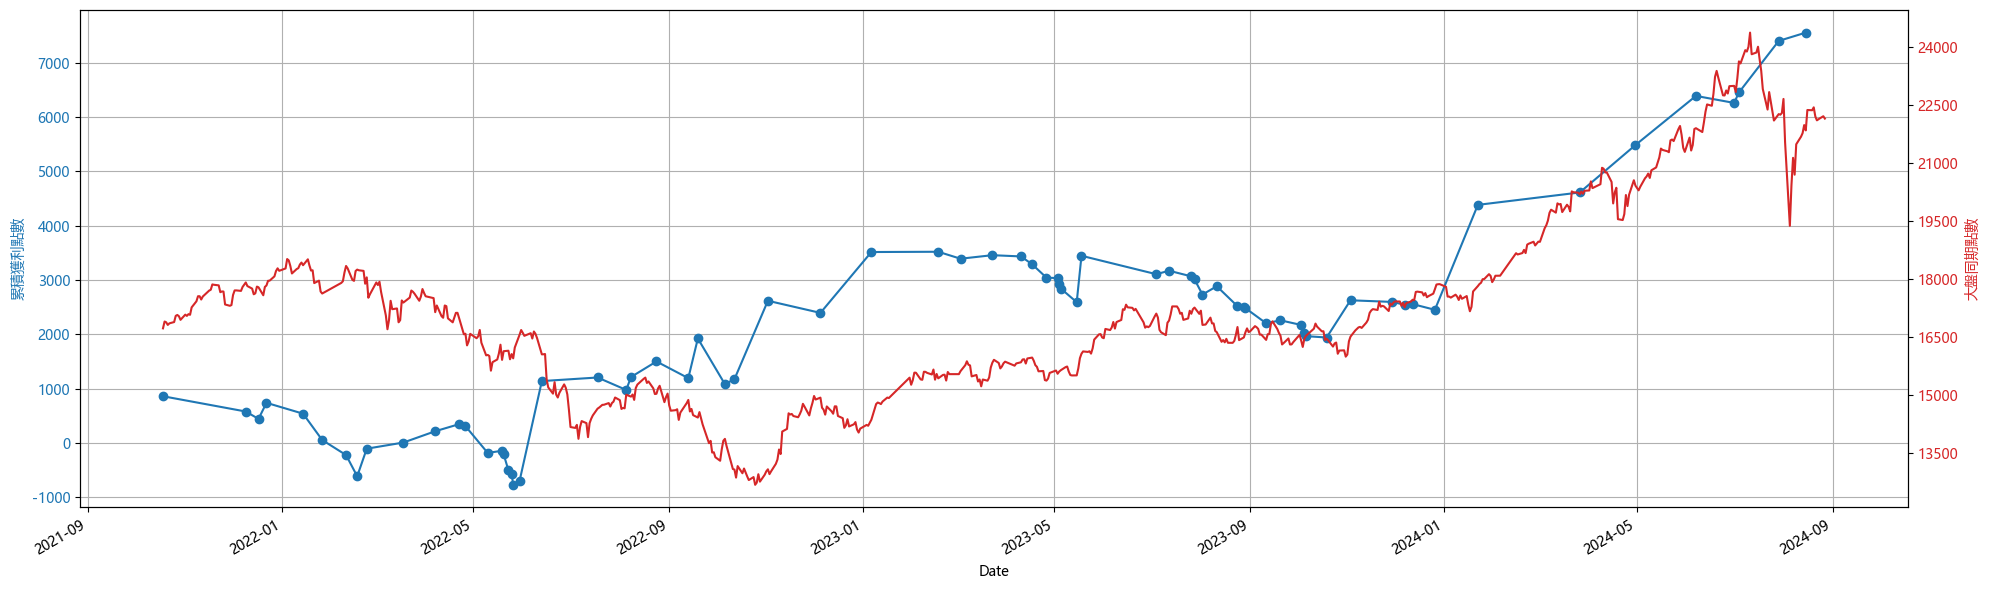

In [86]:
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib.ticker import MaxNLocator

print_data = earm_data2_bs2

# ÂêåÊúüÂ§ßÁõ§Ë≥áÊñô 
tx_df = merged_df[( merged_df['Date'] >=  print_data['buy_date'].iloc[0]) & (merged_df['Date'] <= print_data['sell_date'].iloc[-1])]

print('===Â§ßÁõ§Á¥ØÁ©ç====')
print(tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[-1] - tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0])

print('===Â§ñË≥áÂ∞èÂÖíÊ≥ïÁ¥ØÁ©ç====')
print(print_data['earn'].cumsum().iloc[-1])

print('===ÈÄ≤Âá∫Ê¨°Êï∏====')
print(len(print_data))

print('===Á¨¨‰∏ÄÊ¨°Ë≤∑ÈÄ≤===')
print(print_data['buy_date'].iloc[0])

print('===ÊúÄÂæå‰∏ÄÊ¨°Ë≥£Âá∫===')
print(print_data['sell_date'].iloc[-1])

# Ë®≠ÁΩÆ‰∏≠ÊñáÂ≠óÈ´î
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # ‰ΩøÁî®ÂæÆËªüÊ≠£ÈªëÈ´î (ÂèØÊ†πÊìöÁ≥ªÁµ±Â≠óÈ´îÈÅ∏Êìá)
plt.rcParams['axes.unicode_minus'] = False  # Ëß£Ê±∫Ë≤†ËôüÈ°ØÁ§∫ÂïèÈ°å


# ÂÅáË®≠ 'Date' Â∑≤Á∂ìÊòØÊó•ÊúüÊ†ºÂºè
fig, ax1 = plt.subplots(figsize=(20, 6))

# Á¨¨‰∏ÄÊ¢ùÁ∑ö - ÊúÄÂæåÊàê‰∫§ÂÉπ
ax1.set_xlabel('Date')
ax1.set_ylabel('Á¥ØÁ©çÁç≤Âà©ÈªûÊï∏', color='tab:blue')
ax1.plot(print_data['buy_date'], print_data['earn'].cumsum(), color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# ÈñãÂïüÁ∂≤Ê†º
ax1.grid(True)
# Ë™øÊï¥ Y Ëª∏ÈñìË∑ù (Ë®≠ÂÆöÊõ¥Â§öÊ®ôÁ±§)
ax1.yaxis.set_major_locator(MaxNLocator(prune=None, nbins=10))  # Â¢ûÂä† Y Ëª∏Ê®ôÁ±§Êï∏Èáè

# Âª∫Á´ãÁ¨¨‰∫åÂÄãYËª∏
ax2 = ax1.twinx()  
ax2.set_ylabel('Â§ßÁõ§ÂêåÊúüÈªûÊï∏', color='tab:red')  # ÂèØ‰ª•Ê†πÊìöÈúÄË¶ÅË™øÊï¥Ê®ôÁ±§
ax2.plot(tx_df['Date'], tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Ë™øÊï¥Á¨¨‰∫åÂÄã Y Ëª∏ÈñìË∑ù (ÂêåÊ®£Ë®≠ÂÆöÊõ¥Â§öÊ®ôÁ±§)
ax2.yaxis.set_major_locator(MaxNLocator(prune=None, nbins=10))  # Â¢ûÂä† Y Ëª∏Ê®ôÁ±§Êï∏Èáè

# ÊóãËΩâÊó•ÊúüÊ®ôÁ±§
fig.autofmt_xdate()

# È°ØÁ§∫ÂúñË°®
fig.tight_layout()
plt.show()


In [87]:

# test = merged_df[merged_df['Date'].isin(earm_data1['buy_date'])][['Date', 'ÈñãÁõ§ÂÉπ' ,'ÊúÄÂæåÊàê‰∫§ÂÉπ' ,'10MA','20MA']]

# test['Èñã10'] = test['ÈñãÁõ§ÂÉπ'] - test['10MA']
# test['Êî∂10'] = test['ÊúÄÂæåÊàê‰∫§ÂÉπ'] - test['10MA']
# test


In [205]:
import numpy as np
import warnings
# Ë®àÁÆóË®äËôüÂá∫‰æÜ Â§ñË≥áÂ∞èÂÖíÁøªÂ§öÂñÆ
# Âá∫Â†¥Ë®äËôüÂá∫‰æÜÂæå ÈöîÂ§©ÈñãÁõ§Áõ¥Êé•Ë≥£
# ÂøΩÁï• FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

MA = '10MA'

tx_df_raw = tx_df_raw[tx_df_raw[MA] != 0]
# tx_df_raw[tx_df_raw['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >= tx_df_raw['10MA']]

# tif_investors_df_raw['Â∞èÂ§ñË≥áËÆäÂåñ'] = tif_investors_df_raw['Â∞èÂ§ñË≥á'].diff(1)

tif_investors_df_raw.dropna()

# ‰ΩøÁî® 'Date' Ê¨Ñ‰ΩçÈÄ≤Ë°åÂÖßÈÉ®ÈÄ£Êé•
merged_df = pd.merge(tif_investors_df_raw, tx_df_raw, on='Date', how='inner')

merged_df['hold'] = np.nan

# ÊîπÊàêÂ∞èÂ§ñË≥áÂ§öÂñÆÁöÑË©±ÈÄ≤Â†¥
condition_buy = ((merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] >=  merged_df[MA]) & (merged_df['Â∞èÂ§ñË≥á'] > 0))

condition_sell = (merged_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'] <  merged_df[MA])

merged_df.loc[condition_buy, 'hold'] = 1
merged_df.loc[condition_sell, 'hold'] = 0

merged_df['hold'].ffill(inplace=True)
merged_df['hold'] = merged_df['hold'].fillna(0)

# Ë®àÁÆóÈÄ≤Âá∫

day_list = merged_df['Date'].unique().tolist()
earm_data3 = pd.DataFrame(columns=['buy_date','sell_date','buy_open','sell_open','earn'])

sell_date = pd.to_datetime("1911-01-01")  # Example Timestamp

for day in day_list:
        today_str = day.strftime('%Y-%m-%d')
        stock_df_today = merged_df[merged_df['Date'] == today_str].copy() 

        if((stock_df_today['hold'].iloc[0] == 1) & ( pd.to_datetime(today_str) > sell_date)): # Á¨¶ÂêàÊ¢ù‰ª∂Á¨¨‰∏ÄÂ§©
                #ÈöîÂ§©ÈñãÁõ§ÂÉπË≤∑ÈÄ≤
                buy_open = merged_df[merged_df['Date'] > today_str]['ÈñãÁõ§ÂÉπ'].iloc[0] 
                buy_date = merged_df[merged_df['Date'] > today_str]['Date'].iloc[0] 


                #Ë∑åÁ†¥maÁï∂Â§©
                sell_open = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0] 
                sell_date = merged_df[(merged_df['hold'] == 0) & (merged_df['Date'] > today_str)]['Date'].iloc[0] 
                sell_date = pd.to_datetime(sell_date)

                earn = sell_open - buy_open

                result_df = pd.DataFrame({
                        'buy_date': [buy_date],
                        'sell_date': [sell_date],
                        'buy_open': [buy_open],
                        'sell_open': [sell_open],
                        'earn': [earn]
                        })

                # Âà†Èô§ÂÖ®‰∏∫NAÁöÑÂàóÔºåÈÅøÂÖçÂèØËÉΩÂá∫Áé∞ÁöÑË≠¶Âëä
                result_df.dropna(axis=1, how='all', inplace=True)

                if not result_df.empty:
                        earm_data3 = pd.concat([earm_data3, result_df], ignore_index=True)

        


In [208]:
earm_data3['earncumsum'] = earm_data3['earn'].cumsum()
earm_data3

buy_date  sell_date  buy_open  sell_open    earn  earncumsum
0  2022-07-14 2022-08-02   14237.0    14643.0   406.0       406.0
1  2022-08-08 2022-08-22   14937.0    15175.0   238.0       644.0
2  2022-09-13 2022-09-14   14884.0    14577.0  -307.0       337.0
3  2022-09-16 2022-09-16   14500.0    14483.0   -17.0       320.0
4  2022-10-06 2022-10-11   13932.0    13091.0  -841.0      -521.0
5  2022-10-28 2022-10-28   12855.0    12764.0   -91.0      -612.0
6  2022-11-01 2022-11-28   12960.0    14475.0  1515.0       903.0
7  2022-11-30 2022-12-06   14640.0    14675.0    35.0       938.0
8  2022-12-16 2022-12-16   14440.0    14461.0    21.0       959.0
9  2023-01-06 2023-02-15   14278.0    15398.0  1120.0      2079.0
10 2023-05-05 2023-05-11   15598.0    15518.0   -80.0      1999.0
11 2023-05-17 2023-06-26   15720.0    16880.0  1160.0      3159.0
12 2023-07-04 2023-07-06   17025.0    16686.0  -339.0      2820.0
13 2023-07-12 2023-07-21   16880.0    16944.0    64.0      2884.0
14 2023-07-26 2023-07-26   17206.0    17102.0  -104.0      2780.0
15 2023-07-28 2023-07-31   17155.0    17100.0   -55.0      2725.0
16 2023-08-02 2023-08-02   17093.0    16814.0  -279.0      2446.0
17 2023-08-24 2023-08-25   16788.0    16421.0  -367.0      2079.0
18 2023-08-30 2023-09-07   16738.0    16564.0  -174.0      1905.0
19 2023-09-15 2023-09-19   16848.0    16609.0  -239.0      1666.0
20 2023-10-03 2023-10-03   16497.0    16412.0   -85.0      1581.0
21 2023-10-06 2023-10-18   16476.0    16426.0   -50.0      1531.0
22 2023-11-03 2023-11-27   16488.0    17173.0   685.0      2216.0
23 2023-11-29 2023-12-05   17339.0    17309.0   -30.0      2186.0
24 2024-01-29 2024-03-20   18011.0    19747.0  1736.0      3922.0
25 2024-03-22 2024-04-15   20226.0    20508.0   282.0      4204.0
26 2024-04-25 2024-04-25   19940.0    19885.0   -55.0      4149.0
27 2024-04-29 2024-05-30   20350.0    21391.0  1041.0      5190.0
28 2024-06-04 2024-06-04   21560.0    21320.0  -240.0      4950.0
29 2024-06-07 2024-06-25   21839.0    22743.0   904.0      5854.0
30 2024-07-05 2024-07-17   23659.0    23679.0    20.0      5874.0
31 2024-08-12 2024-08-27   21650.0    22146.0   496.0      6370.0

===Â§ßÁõ§Á¥ØÁ©ç====
7757.0
===Â§ñË≥áÂ∞èÂÖíÊ≥ïÁ¥ØÁ©ç====
6370.0
===ÈÄ≤Âá∫Ê¨°Êï∏====
32
===Á¨¨‰∏ÄÊ¨°Ë≤∑ÈÄ≤===
2022-07-14 00:00:00
===ÊúÄÂæå‰∏ÄÊ¨°Ë≥£Âá∫===
2024-08-27 00:00:00


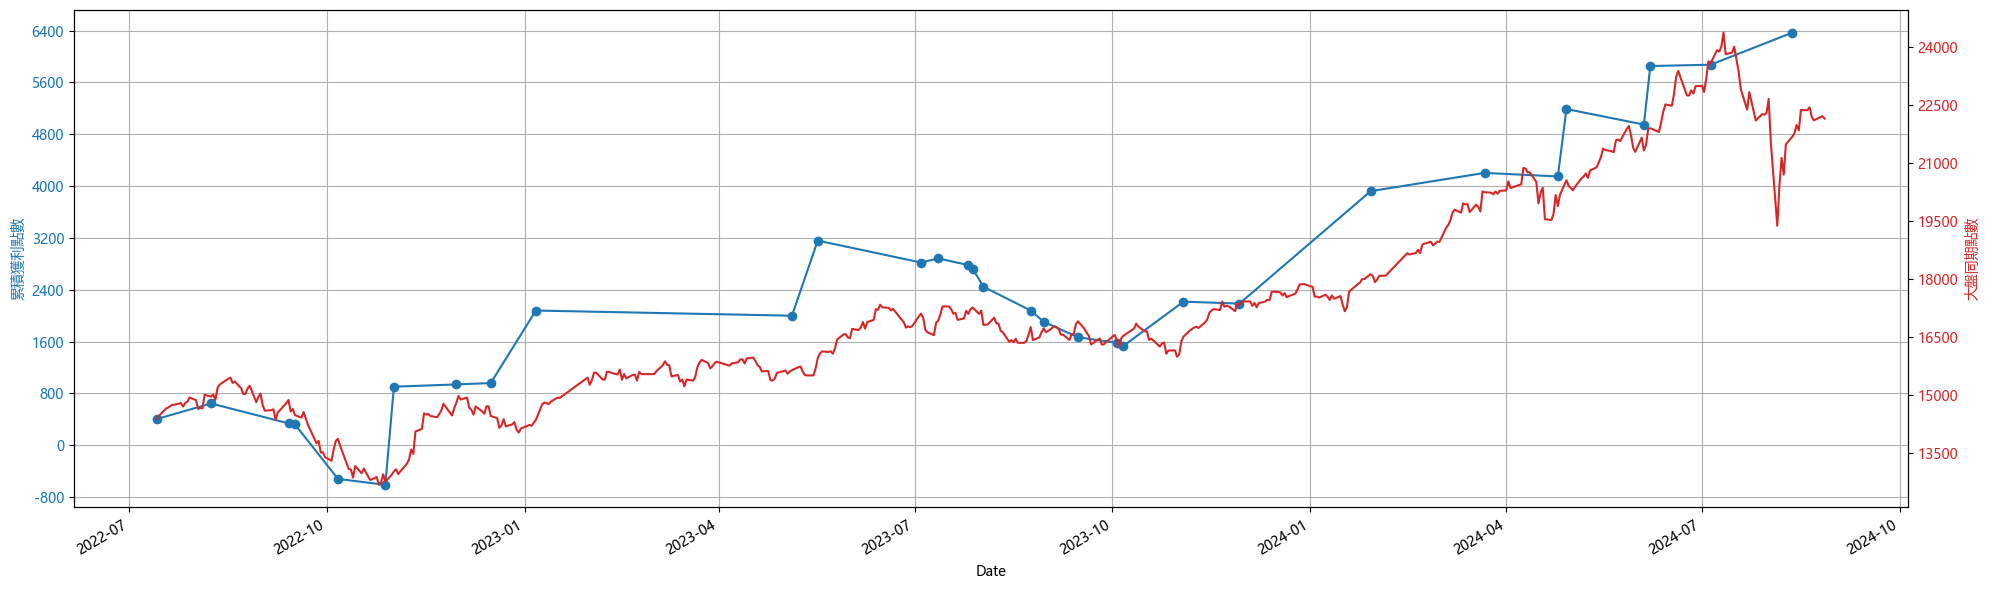

In [207]:
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib.ticker import MaxNLocator

# ÂêåÊúüÂ§ßÁõ§Ë≥áÊñô 
tx_df = merged_df[( merged_df['Date'] >=  earm_data3['buy_date'].iloc[0]) & (merged_df['Date'] <= earm_data3['sell_date'].iloc[-1])]

print('===Â§ßÁõ§Á¥ØÁ©ç====')
print(tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[-1] - tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'].iloc[0])

print('===Â§ñË≥áÂ∞èÂÖíÊ≥ïÁ¥ØÁ©ç====')
print(earm_data3['earn'].cumsum().iloc[-1])

print('===ÈÄ≤Âá∫Ê¨°Êï∏====')
print(len(earm_data3))

print('===Á¨¨‰∏ÄÊ¨°Ë≤∑ÈÄ≤===')
print(earm_data3['buy_date'].iloc[0])

print('===ÊúÄÂæå‰∏ÄÊ¨°Ë≥£Âá∫===')
print(earm_data3['sell_date'].iloc[-1])

# Ë®≠ÁΩÆ‰∏≠ÊñáÂ≠óÈ´î
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # ‰ΩøÁî®ÂæÆËªüÊ≠£ÈªëÈ´î (ÂèØÊ†πÊìöÁ≥ªÁµ±Â≠óÈ´îÈÅ∏Êìá)
plt.rcParams['axes.unicode_minus'] = False  # Ëß£Ê±∫Ë≤†ËôüÈ°ØÁ§∫ÂïèÈ°å


# ÂÅáË®≠ 'Date' Â∑≤Á∂ìÊòØÊó•ÊúüÊ†ºÂºè
fig, ax1 = plt.subplots(figsize=(20, 6))

# Á¨¨‰∏ÄÊ¢ùÁ∑ö - ÊúÄÂæåÊàê‰∫§ÂÉπ
ax1.set_xlabel('Date')
ax1.set_ylabel('Á¥ØÁ©çÁç≤Âà©ÈªûÊï∏', color='tab:blue')
ax1.plot(earm_data3['buy_date'], earm_data3['earn'].cumsum(), color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# ÈñãÂïüÁ∂≤Ê†º
ax1.grid(True)
# Ë™øÊï¥ Y Ëª∏ÈñìË∑ù (Ë®≠ÂÆöÊõ¥Â§öÊ®ôÁ±§)
ax1.yaxis.set_major_locator(MaxNLocator(prune=None, nbins=10))  # Â¢ûÂä† Y Ëª∏Ê®ôÁ±§Êï∏Èáè

# Âª∫Á´ãÁ¨¨‰∫åÂÄãYËª∏
ax2 = ax1.twinx()  
ax2.set_ylabel('Â§ßÁõ§ÂêåÊúüÈªûÊï∏', color='tab:red')  # ÂèØ‰ª•Ê†πÊìöÈúÄË¶ÅË™øÊï¥Ê®ôÁ±§
ax2.plot(tx_df['Date'], tx_df['ÊúÄÂæåÊàê‰∫§ÂÉπ'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Ë™øÊï¥Á¨¨‰∫åÂÄã Y Ëª∏ÈñìË∑ù (ÂêåÊ®£Ë®≠ÂÆöÊõ¥Â§öÊ®ôÁ±§)
ax2.yaxis.set_major_locator(MaxNLocator(prune=None, nbins=10))  # Â¢ûÂä† Y Ëª∏Ê®ôÁ±§Êï∏Èáè

# ÊóãËΩâÊó•ÊúüÊ®ôÁ±§
fig.autofmt_xdate()

# È°ØÁ§∫ÂúñË°®
fig.tight_layout()
plt.show()
